<a href="https://colab.research.google.com/github/AdityaShyamsundar/ML_Regression_Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Bike Sharing Demand Prediction

##### **Project Type** - Regression
##### **Contribution** - Individual
##### **Submitted by** - Aditya Shyamsundar

# **Project Summary -**

## **Data Preprocessing**
* Importing Libraries
* Mounting Drive and Loading Dataset
* Variable Description
* Simplifying Variables
* Handling Missing/Null Values
* Converting the 'Date' Column
* Converting int64 columns to catagory columns


## **Exploratory Data Analysis (EDA)**
* Visualizing Hourly comparison of whole data of Rented Bike Count.
* Visualizing Months comparing Rented Bike Count.
* Visualizing Weekdays & Weekends comparing Rented Bike Count.
* Visualizing Functioning & Non-functioning Day comparing Rented Bike Count.
* Visualizing Holiday & Non-holiday comparing Rented Bike Count.
* Visualizing Seasons comparing Rented Bike Count.
* Visualizing Correlation of the variables in dataset.


## **Implementing Machine Learning Algorithms**
* Linear Regression
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest
* Gradient Boosting Regressor with GridSearchCV

# **GitHub Link -**

https://github.com/AdityaShyamsundar

# **Problem Statement**


**We have to develop a predictive model that accurately forecasts the demand for bike sharing in Seoul, South Korea. The model should take into account various factors such as weather conditions, time of day, day of the week, and other relevant variables to provide accurate predictions of the number of bikes that will be rented at a given time. The goal is to help bike sharing companies optimize their operations, improve resource allocation, and enhance customer satisfaction by ensuring a sufficient supply of bikes at high-demand locations and times.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from datetime import datetime
import datetime as dt

from scipy.stats import ttest_ind

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import skew, kurtosis

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
bsd_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Projects/Bike Sharing Demand - Regression/SeoulBikeData.csv',encoding = 'latin')

### Dataset First View

In [ ]:
# Dataset First Look
bsd_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bsd_df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
bsd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### What did you know about your dataset?

The dataset is of bike sharing demand prediction in Seoul, South Korea. The dataset contains information on the hourly bike rental counts from January 2017 to December 2018, as well as weather and date/time related features.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(bsd_df[bsd_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bsd_df.isnull().sum()
bsd_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

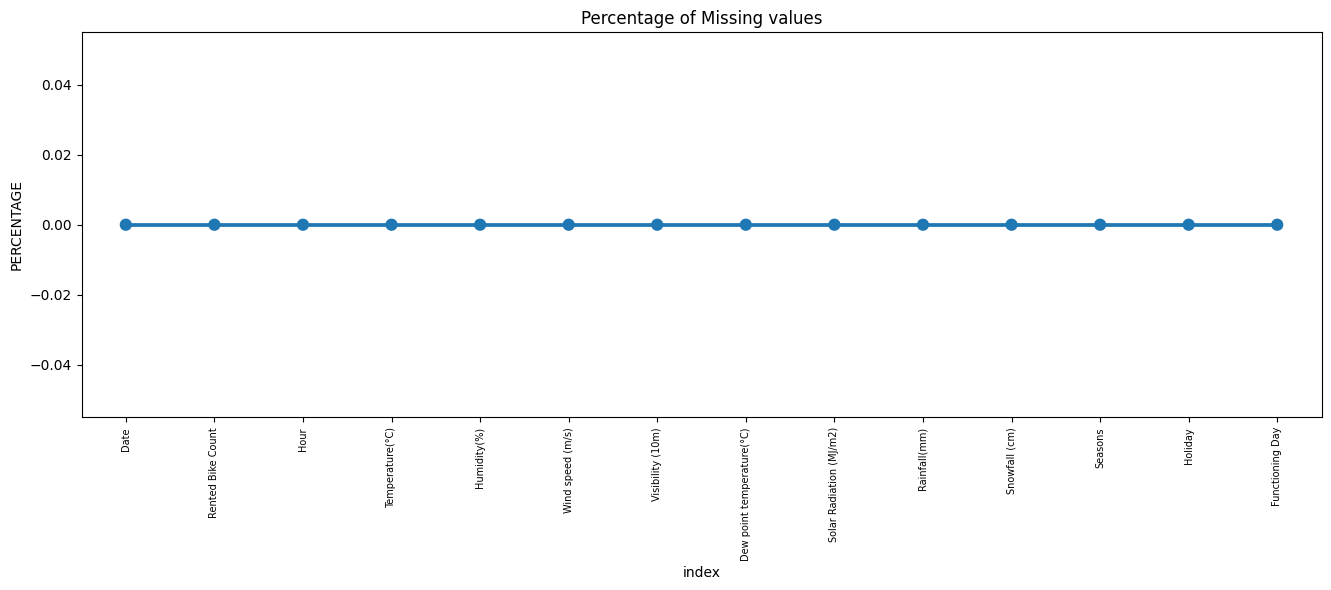

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((bsd_df.isnull().sum())*100/bsd_df.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot(x = 'index',y = 0,data = missing)
plt.xticks(rotation = 90,fontsize = 7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bsd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bsd_df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

### Variables Description 

* **Date:** The date on which the data was recorded
* **Rented Bike Count:** The number of bikes rented at a given hour
* **Hour:** The hour of the day (0 to 23)
* **Temperature:** The temperature in Celsius at the time of recording
* **Humidity:** The relative humidity at the time of recording
* **Wind speed:** The wind speed in m/s at the time of recording
* **Visibility:** The visibility in meters at the time of recording
* **Dew point temperature:** The dew point temperature in Celsius at the time of recording
* **Solar Radiation:** The solar radiation in MJ/m2 at the time of recording
* **Rainfall:** The rainfall in mm at the time of recording
* **Snowfall:** The snowfall in cm at the time of recording
* **Seasons:** The season of the year (Spring, Summer, Fall, Winter)
* **Holiday:** Whether the day was a holiday or not (Yes/No)
* **Functioning Day:** Whether the day was a functioning day or not (Yes/No)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
bsd_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Simplifying Column Names
bsd_df = bsd_df.rename(columns = {'Rented Bike Count':'Rented_Bike_Count',
                                  'Temperature(°C)':'Temperature',
                                  'Humidity(%)':'Humidity',
                                  'Wind speed (m/s)':'Wind_speed',
                                  'Visibility (10m)':'Visibility',
                                  'Dew point temperature(°C)':'Dew_point_temperature',
                                  'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                  'Rainfall(mm)':'Rainfall',
                                  'Snowfall (cm)':'Snowfall',
                                  'Functioning Day':'Functioning_Day'})

In [ ]:
# Changing the "Date" column into three "year","month","day" column
bsd_df['Date'] = bsd_df['Date'].apply(lambda x:
                                      dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
# Changing Date column to 3 separate columns - Day, Month and Year
bsd_df['year'] = bsd_df['Date'].dt.year
bsd_df['month'] = bsd_df['Date'].dt.month
bsd_df['day'] = bsd_df['Date'].dt.day_name()

In [ ]:
# Creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bsd_df['weekdays_weekend'] = bsd_df['day'].apply(lambda x : 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekday' )
bsd_df = bsd_df.drop(columns = ['Date','day','year'],axis = 1)

In [ ]:
# Change the int64 column into catagory column
cols = ['Hour','month','weekdays_weekend']
for col in cols:
  bsd_df[col] = bsd_df[col].astype('category')

### What all manipulations have you done and insights you found?

* Simplified Column Names
* Converted Date column to 3 separate columns - Day, Month & Year
* Created new column of Weekday_Weekend and dropped Date, Day, Year columns
* Converted int64 columns to catagory column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Hourly comparison of whole data

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour')]

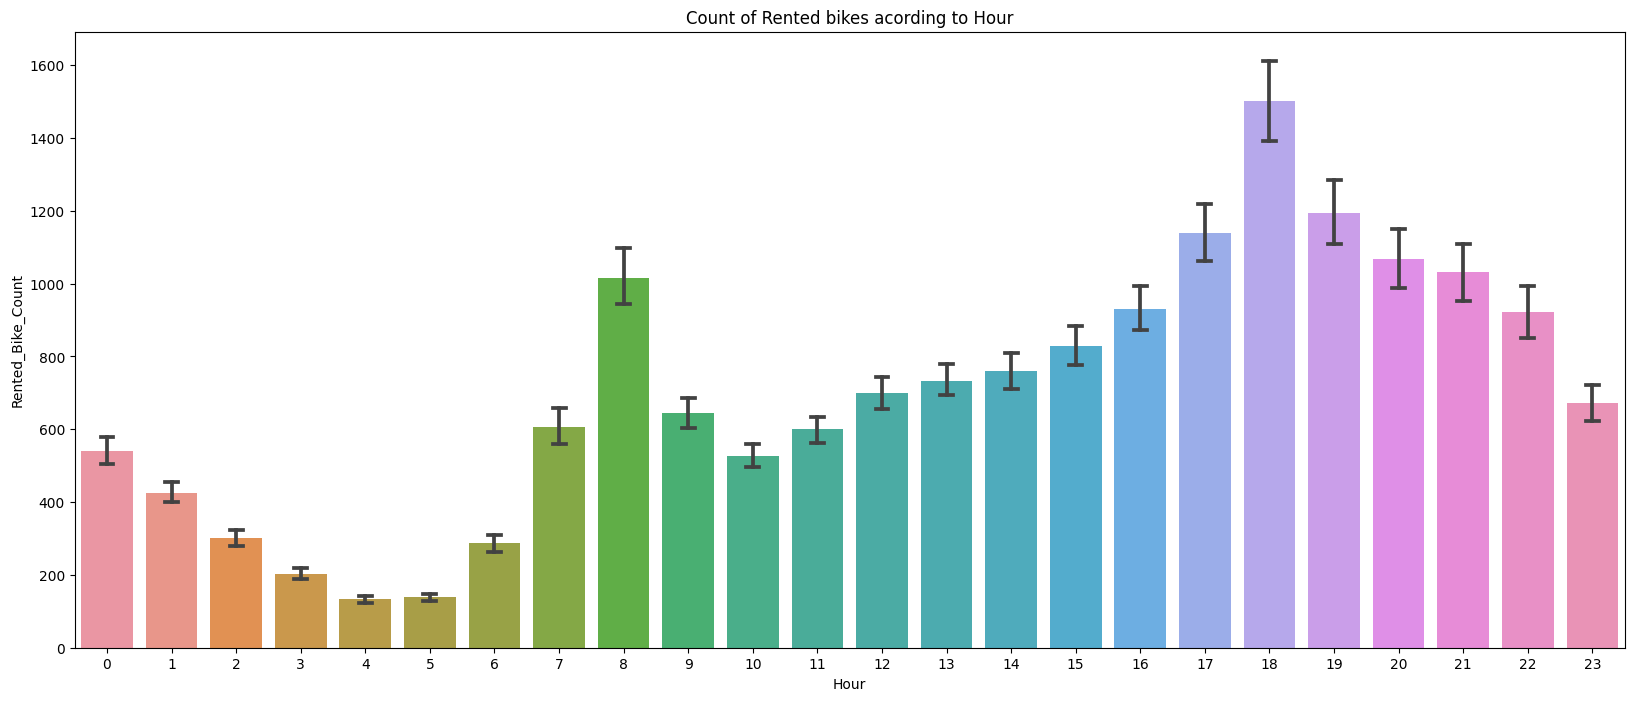

In [ ]:
# Visualizing average Rented Bike Count per Hour
fig,ax = plt.subplots(figsize = (20,8))
sns.barplot(data = bsd_df,x = 'Hour',y = 'Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to Hour')

##### 1. Why did you pick the specific chart?

Barplot is easy to visualize and compare categorical data or the distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

* This barplot shows us the hourly average count of rented bike where data is of whole year.

* Generally people use rented bikes during from 7am to 9am and 5pm to 7pm.

#### Months

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

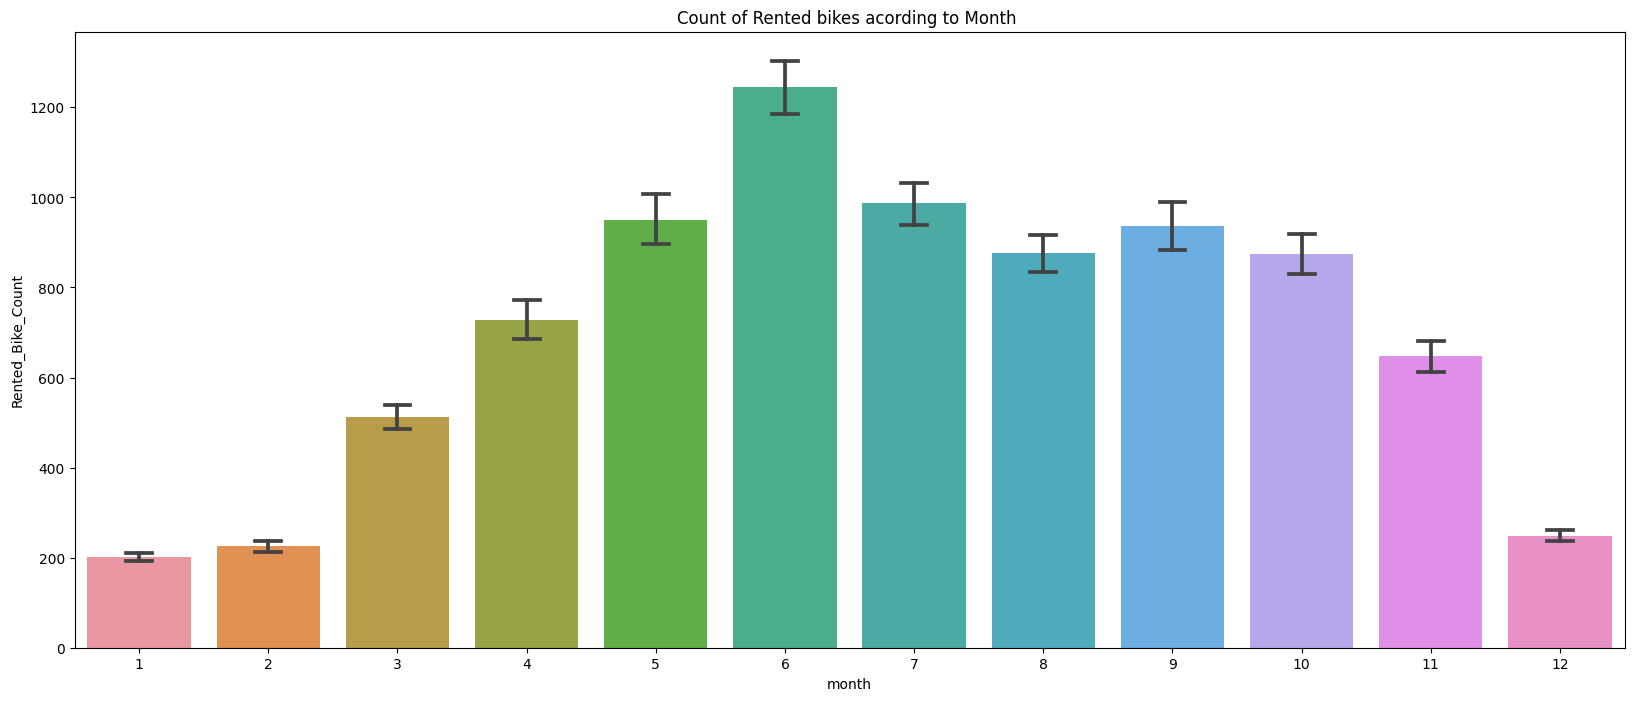

In [ ]:
# Visualizing average Rented Bike Count per Month
fig,ax = plt.subplots(figsize = (20,8))
sns.barplot(data = bsd_df,x = 'month',y = 'Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to Month ')

##### 1. Why did you pick the specific chart?

Barplot is easy to visualize and compare categorical data or the distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

* From the above bar plot we can see that from the month 5 to 10 the demand of the rented bike is high as compare to other months. Where 5th month Falls under SPRING, Months 6th to 8th fall under summer and months 9th and 10th fall under Autumn. Where as 6th month has highest demand of rented bikes.

#### Weekdays & Weekends

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

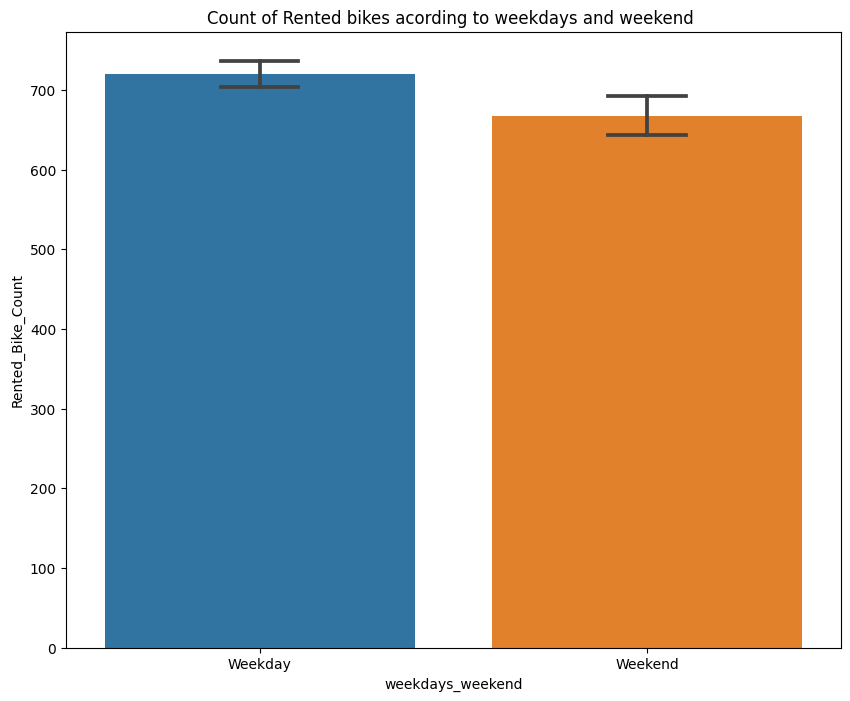

In [ ]:
# Visualizing average Rented Bike Count for Weekdays and Weekends
fig,ax = plt.subplots(figsize = (10,8))
sns.barplot(data = bsd_df,x = 'weekdays_weekend',y = 'Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

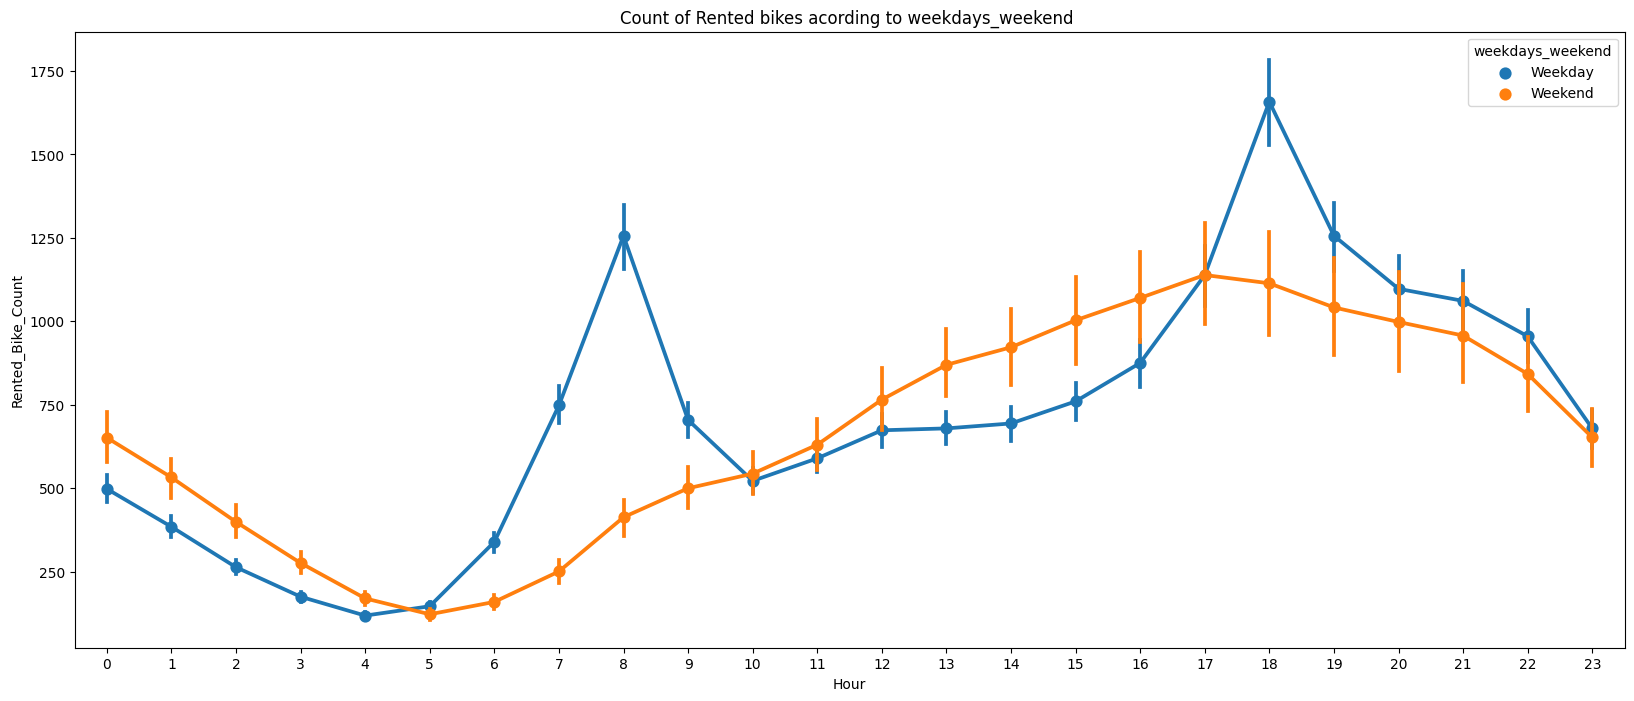

In [ ]:
# Visualizing average Rented Bike Count per Hour to compare Weekdays and Weekends
fig,ax = plt.subplots(figsize = (20,8))
sns.pointplot(data = bsd_df,x = 'Hour',y = 'Rented_Bike_Count',hue = 'weekdays_weekend',ax = ax)
ax.set(title = 'Count of Rented bikes acording to weekdays_weekend ')

##### 1. Why did you pick the specific chart?

* Barplot is easy to visualize and compare categorical data or the distribution of a categorical variable.
* Pointplot is easy to visualize the relationship between two categorical variables and display the average value or distribution of a numerical variable for each category.

##### 2. What is/are the insight(s) found from the chart?

**Barplot**
* The first barplot shows that weekdays has more average count of rented bikes than weekends.

**Pointplot**
* From the point plot we can see that the weekdays which is in blue colour show that the demand of the bike higher as those are working days.

* Peak Time are 7 am to 9 am and 5 pm to 7 pm.
* The weekend days which is in orange colour shows that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

#### Functioning & Non-functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

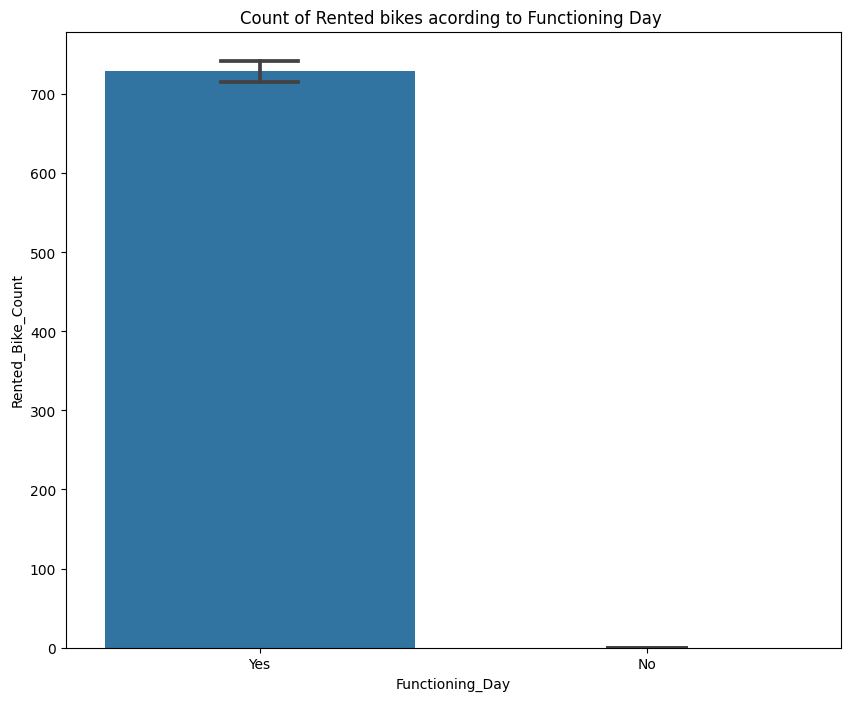

In [ ]:
# Visualizing average Rented Bike Count for Functioning and Non-functioning day
fig,ax = plt.subplots(figsize = (10,8))
sns.barplot(data = bsd_df,x = 'Functioning_Day',y = 'Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

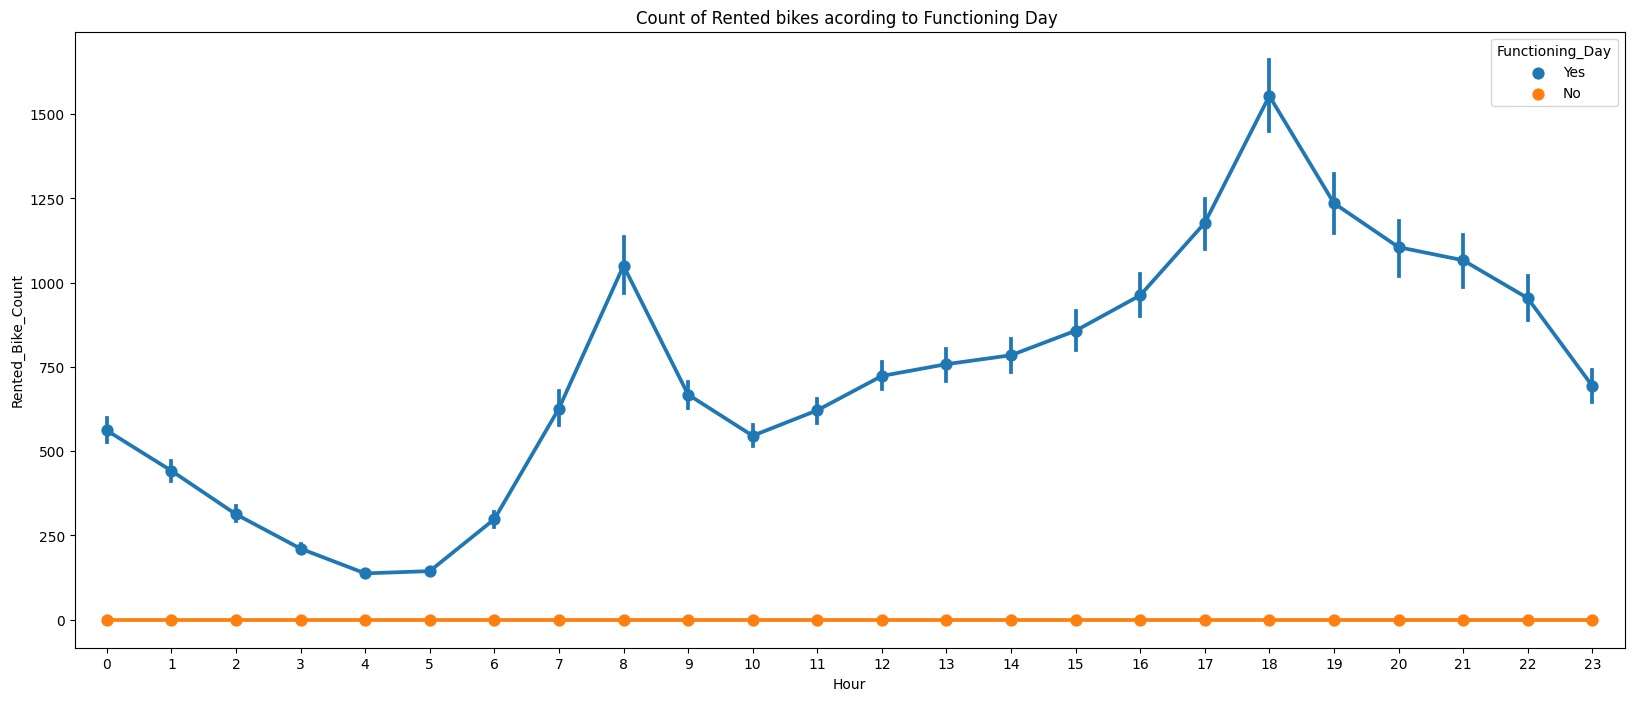

In [ ]:
# Visualizing average Rented Bike Count per hour to compare Functioning and Non-functioning day
fig,ax = plt.subplots(figsize = (20,8))
sns.pointplot(data = bsd_df,x = 'Hour',y = 'Rented_Bike_Count',hue = 'Functioning_Day',ax = ax)
ax.set(title = 'Count of Rented bikes acording to Functioning Day ')

##### 1. Why did you pick the specific chart?

* Barplot is easy to visualize and compare categorical data or the distribution of a categorical variable.
* Pointplot is easy to visualize the relationship between two categorical variables and display the average value or distribution of a numerical variable for each category.

##### 2. What is/are the insight(s) found from the chart?

**Barplot**
* This barplot shows that non functioning day has almost no count of rented bikes, Where as on functioning day count is very high.
* Peoples dont use reneted bikes in no functioning day.

**Pointplot**
* This pointplot shows the count of rented bike in functioning and non-functioning day.
* It clearly shows that People rented bikes on functioning day only.

#### Holiday & Non-holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

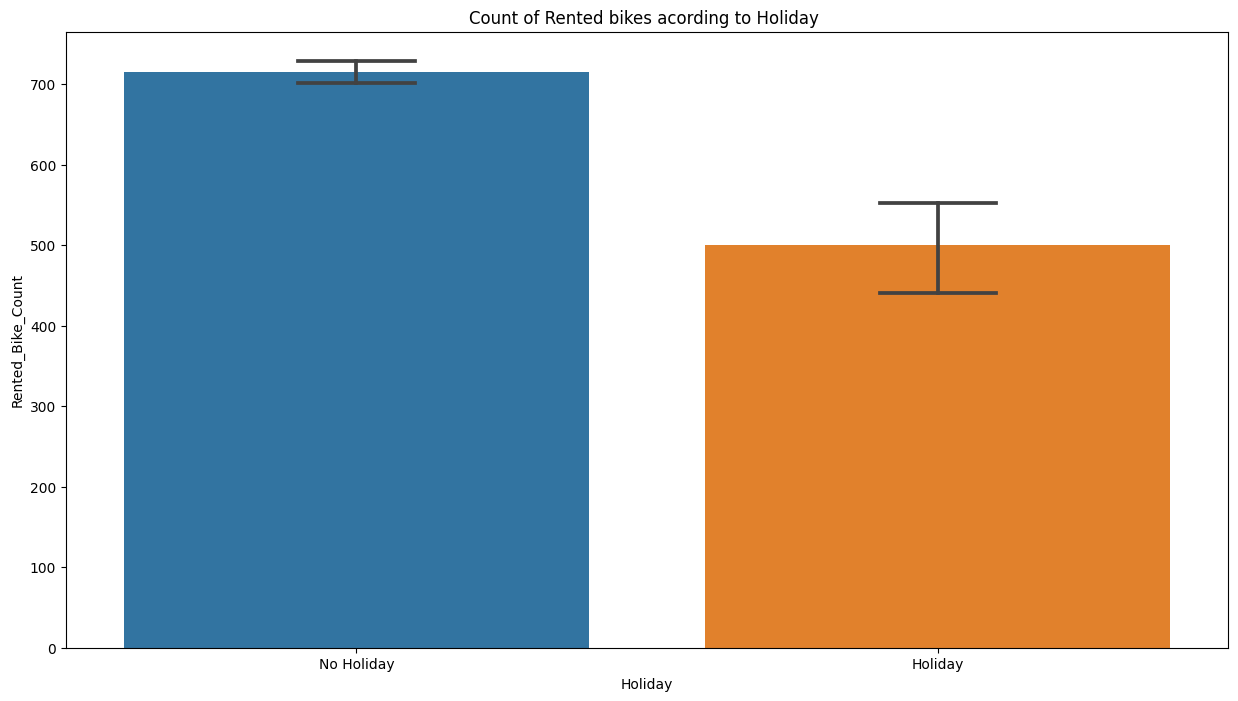

In [ ]:
# Visualizing average Rented Bike Count for Holiday & Non-holiday
fig,ax = plt.subplots(figsize = (15,8))
sns.barplot(data = bsd_df,x = 'Holiday',y = 'Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

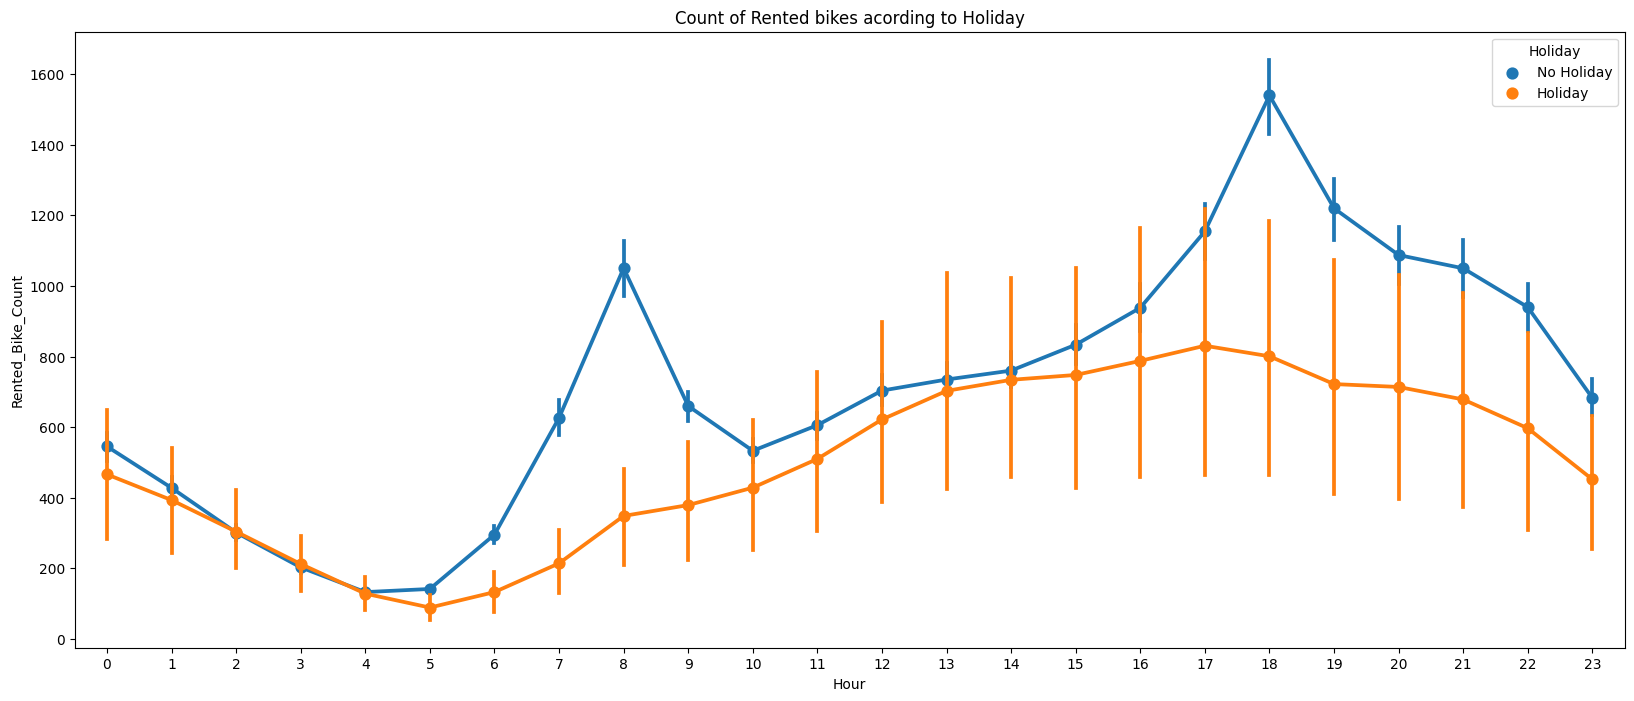

In [ ]:
# Visualizing average Rented Bike Count per hour to compare Holiday & Non-holiday
fig,ax = plt.subplots(figsize = (20,8))
sns.pointplot(data = bsd_df,x = 'Hour',y = 'Rented_Bike_Count',hue = 'Holiday',ax = ax)
ax.set(title = 'Count of Rented bikes acording to Holiday')

##### 1. Why did you pick the specific chart?

* Barplot is easy to visualize and compare categorical data or the distribution of a categorical variable.
* Pointplot is easy to visualize the relationship between two categorical variables and display the average value or distribution of a numerical variable for each category.

##### 2. What is/are the insight(s) found from the chart?

**Barplot**
* This barplot shows that Holiday has almost no count of rented bikes, Where as on functioning day count is very high.
* Peoples dont use reneted bikes in no functioning day.

**Pointplot**
* This pointplot shows the count of rented bike in Holiday and non-holidayday.
* We can see that there's a hike in rented bikes on non-holiday between 7am to 9am and between 5pm to 7pm.
* Where on holiday Rented bike count is close to as on non-holiday at 12am and falls down till 5 am and rises eventually till 5pm.

#### Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

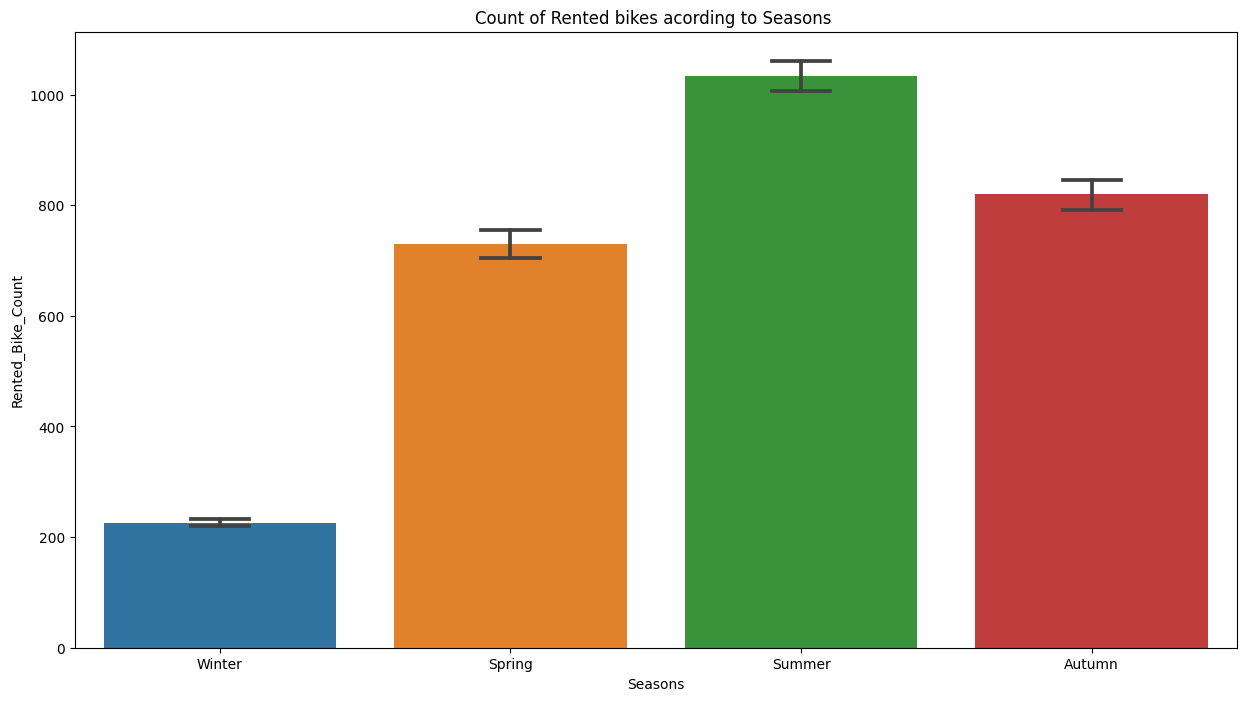

In [ ]:
# Visualizing count of rented bikes according to seasons
fig,ax = plt.subplots(figsize = (15,8))
sns.barplot(data = bsd_df,x = 'Seasons',y = 'Rented_Bike_Count',ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons')]

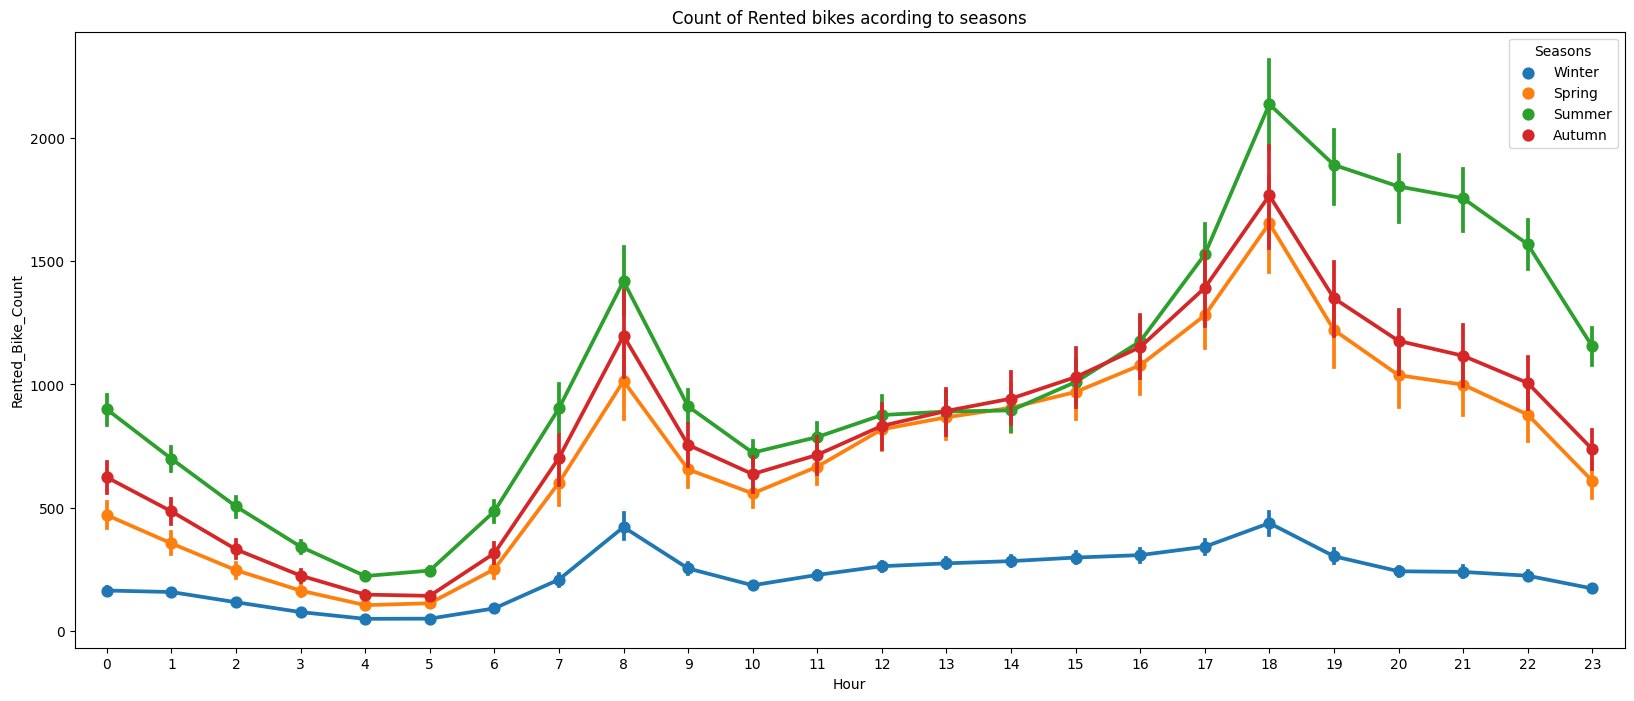

In [ ]:
# Visualizing average Rented Bike Count per Hour to compare according to seasons
fig,ax = plt.subplots(figsize = (20,8))
sns.pointplot(data = bsd_df,x = 'Hour',y = 'Rented_Bike_Count',hue = 'Seasons',ax = ax)
ax.set(title = 'Count of Rented bikes acording to seasons')

##### 1. Why did you pick the specific chart?

* Barplot is easy to visualize and compare categorical data or the distribution of a categorical variable.
* Pointplot is easy to visualize the relationship between two categorical variables and display the average value or distribution of a numerical variable for each category.

##### 2. What is/are the insight(s) found from the chart?

**In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,**
* The pattern is almost similar
* In summer season the count of rented bike is high and peak time is 7am-9am and 7pm-5pm.
* In winter season the count of rented bike is very low because of snowfall.

#### Analysis of Numerical variables distplots

Numerical data refers to a type of data that is represented in numbers, rather than descriptive language. It is also referred to as quantitative data and is always gathered in numerical form. What sets numerical data apart from other types of number-based data is its capacity to perform arithmetic operations with the numbers it contains.

In [ ]:
# Assign the numerical coulmn to variables
numerical_columns = list(bsd_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

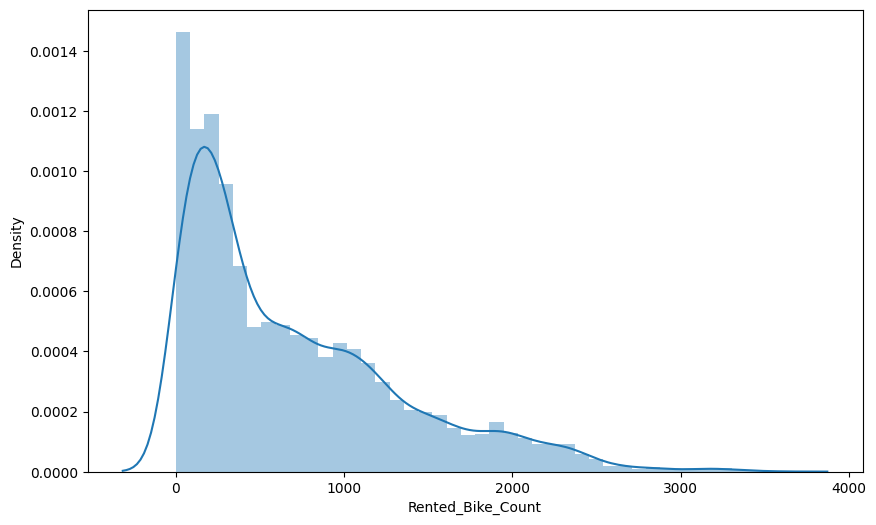

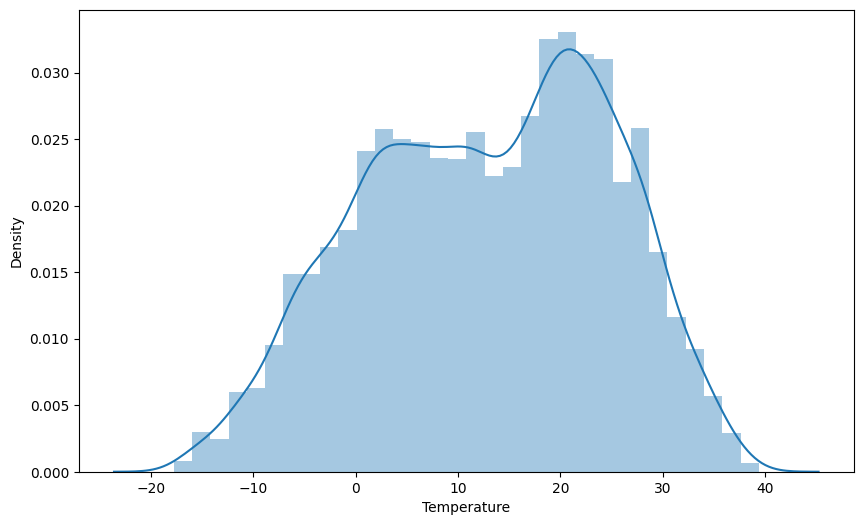

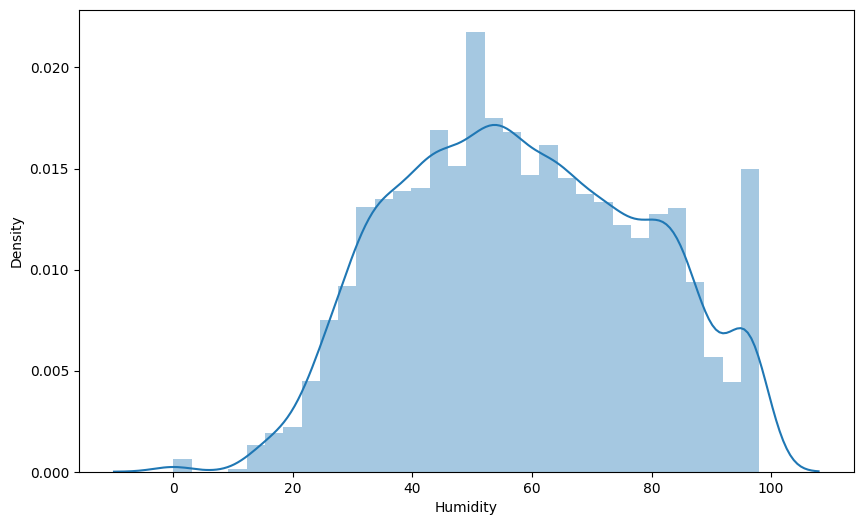

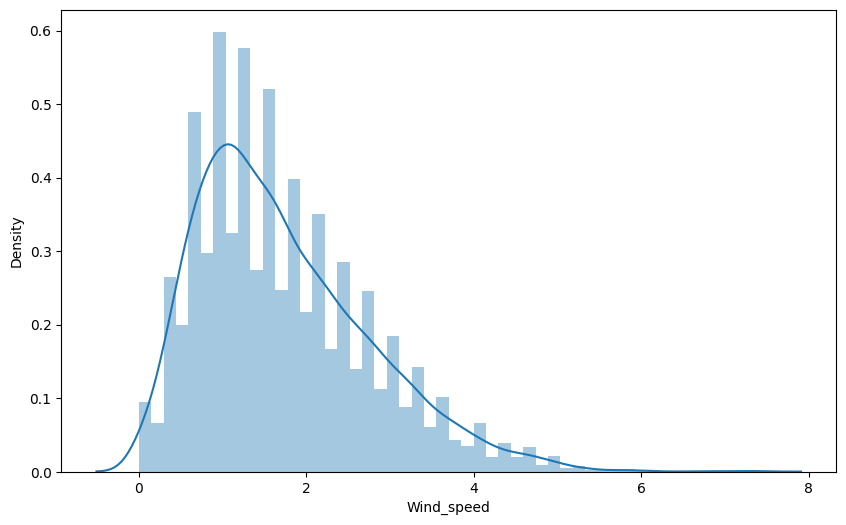

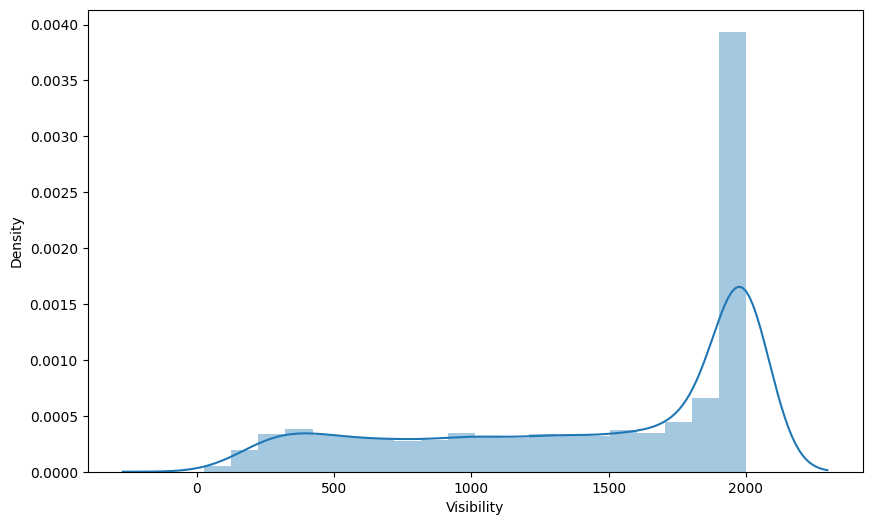

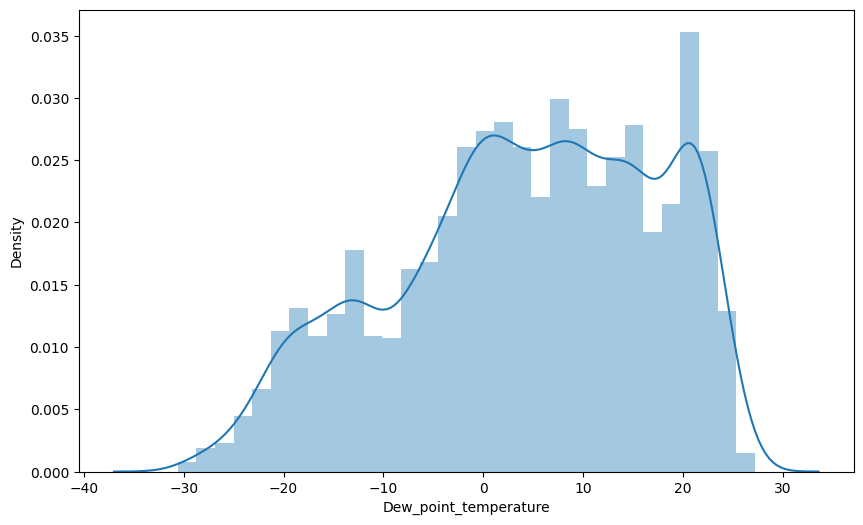

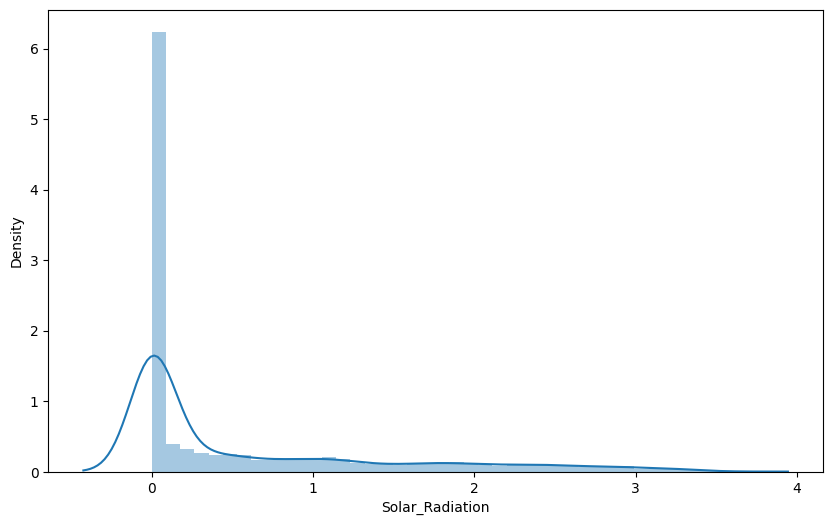

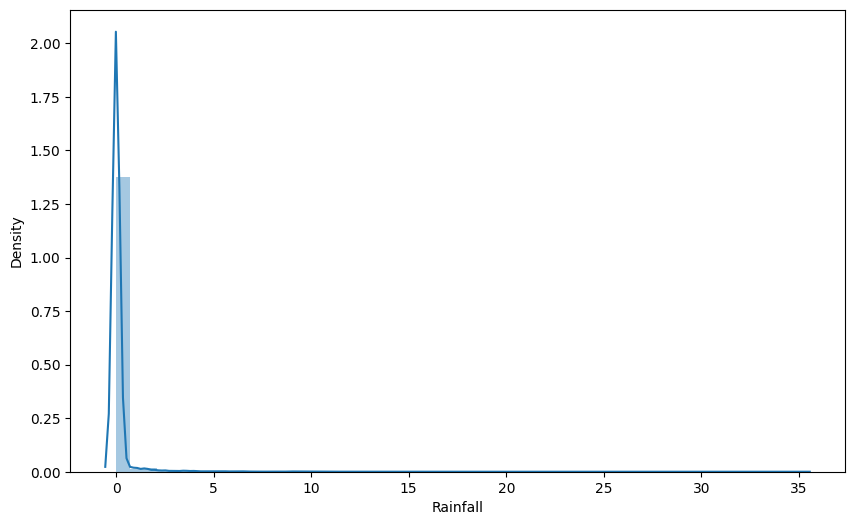

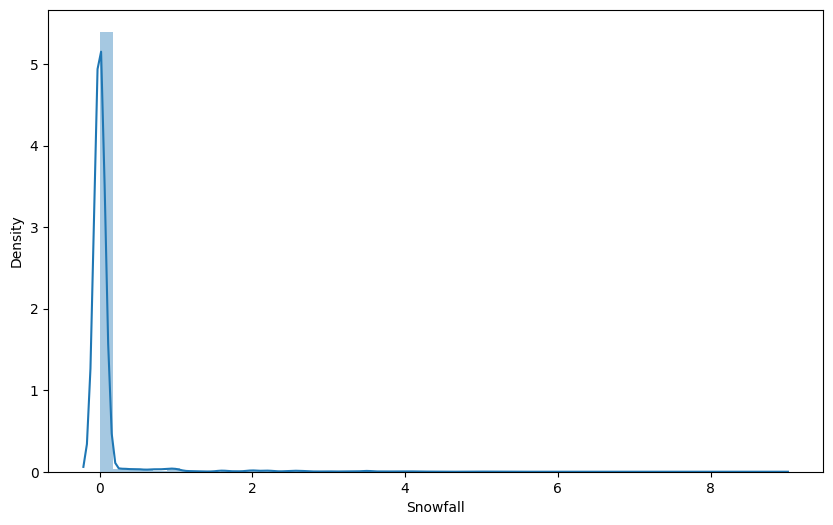

In [ ]:
# Printing displots to analyze the distribution of all numerical features
for col in numerical_features:
 plt.figure(figsize = (10,6))
 sns.distplot(x = bsd_df[col])
 plt.xlabel(col)
plt.show()

##### 1. Why did you pick the specific chart?

Displot is easy to visualize the distribution of a single variable or compare the distributions of multiple variables in a dataset.

#### Regression Plot

The primary purpose of Seaborn's regression plots is to aid in exploratory data analysis by visually emphasizing patterns in a dataset. These plots generate a regression line between two variables, thus providing a clear representation of their linear relationships.

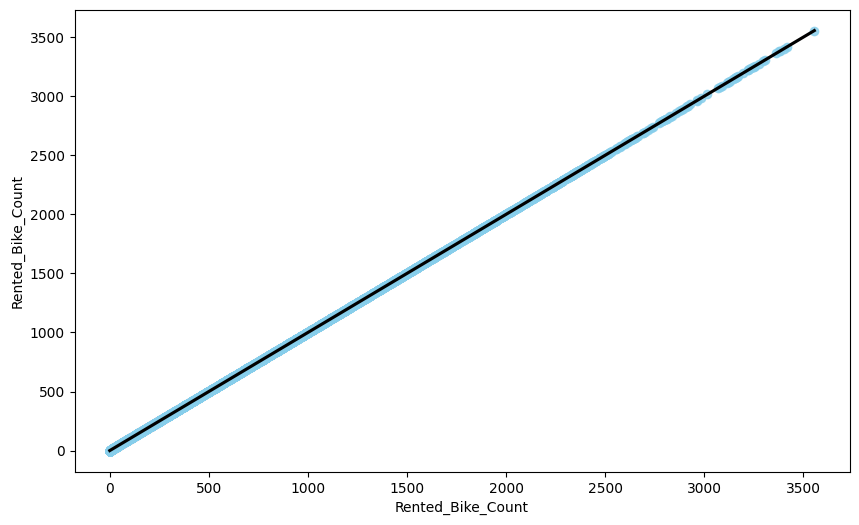

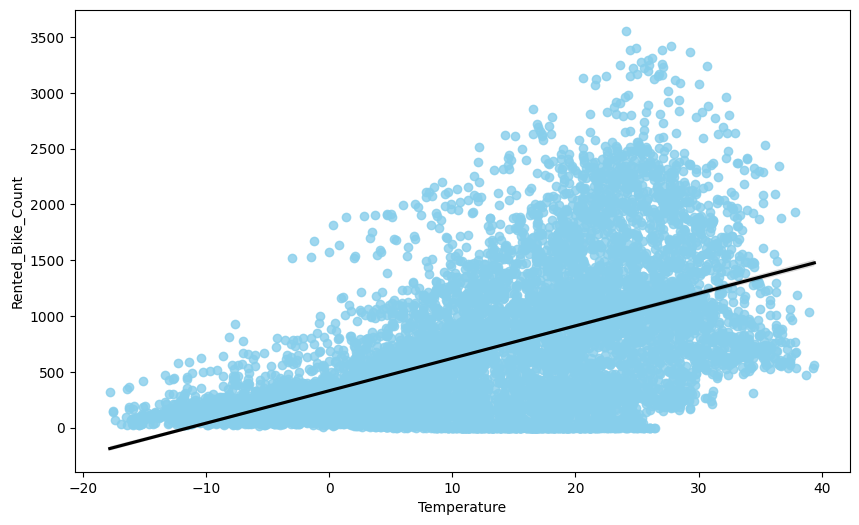

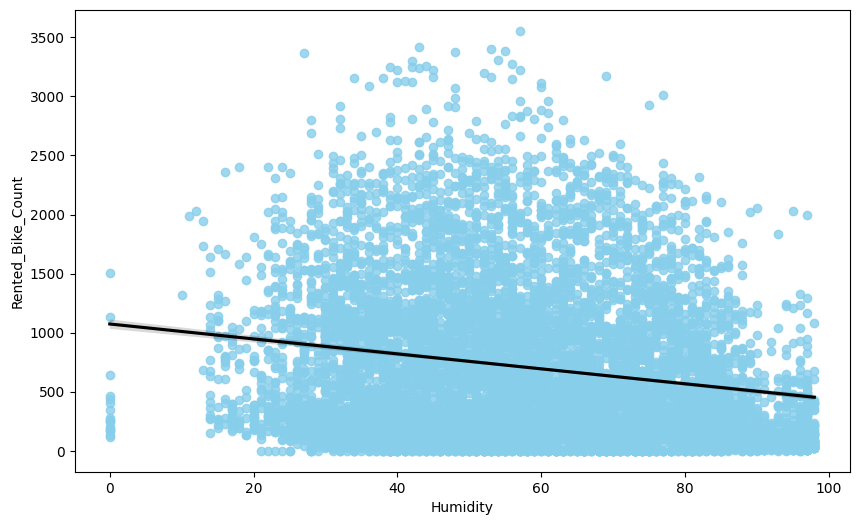

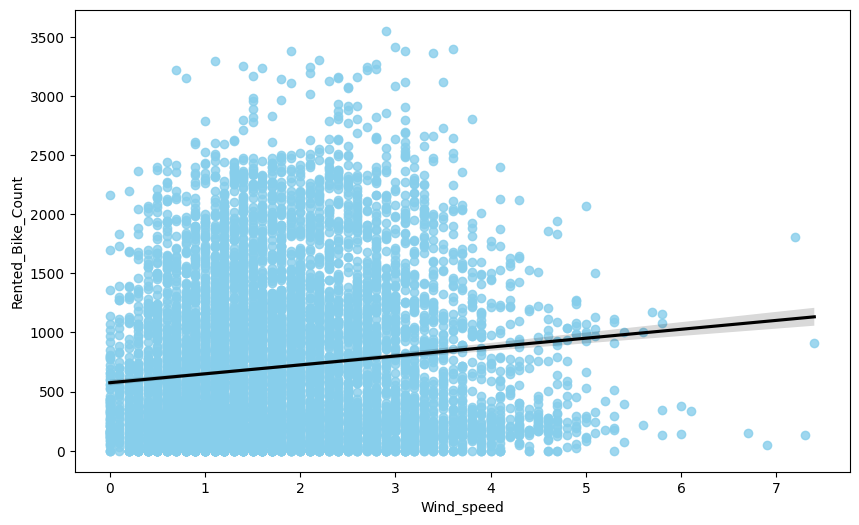

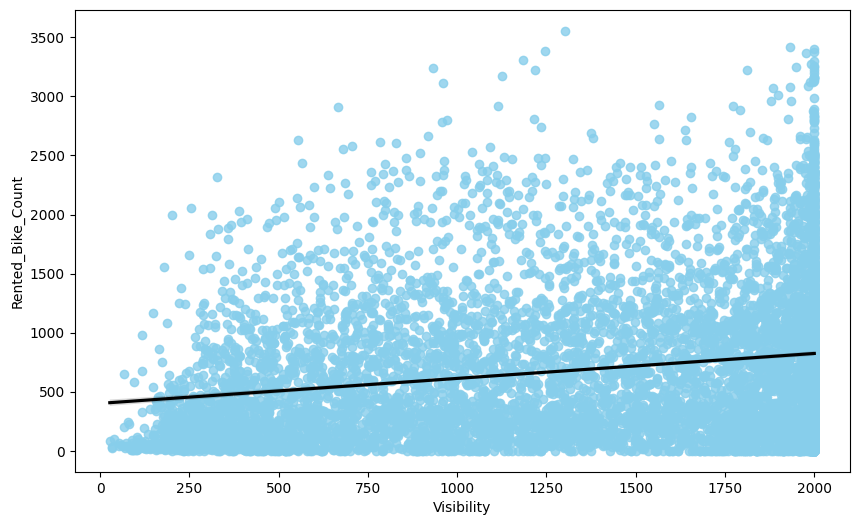

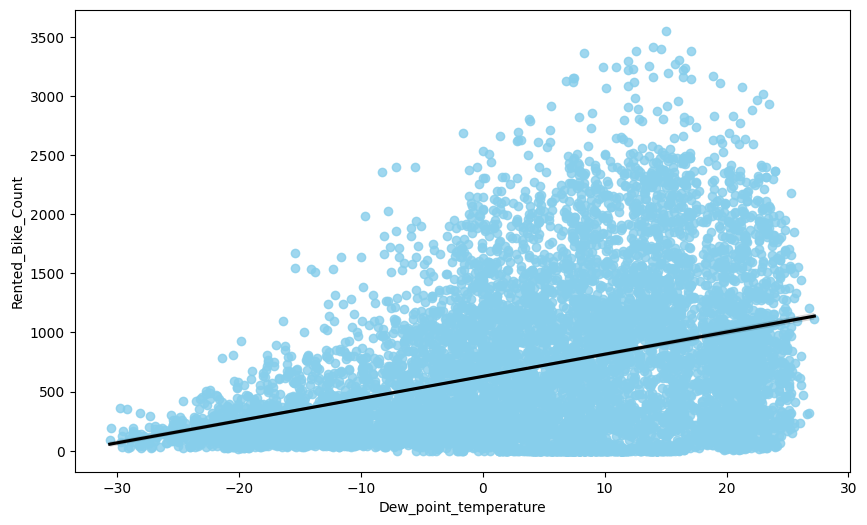

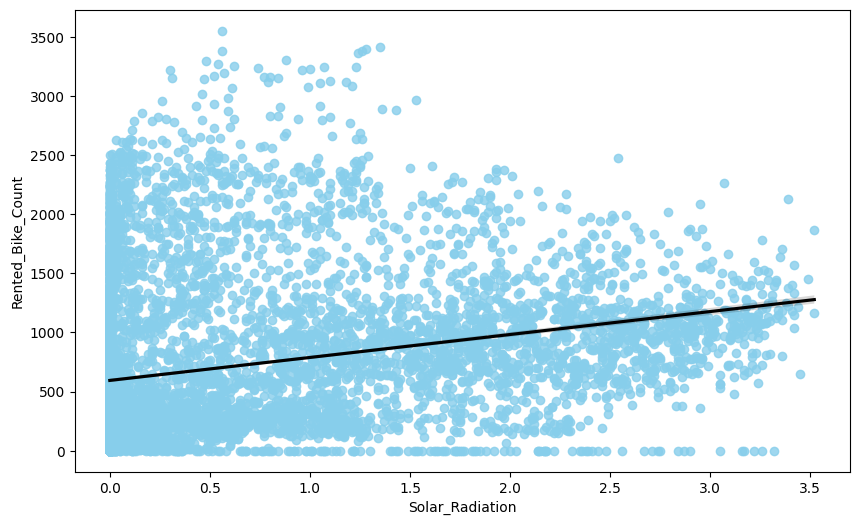

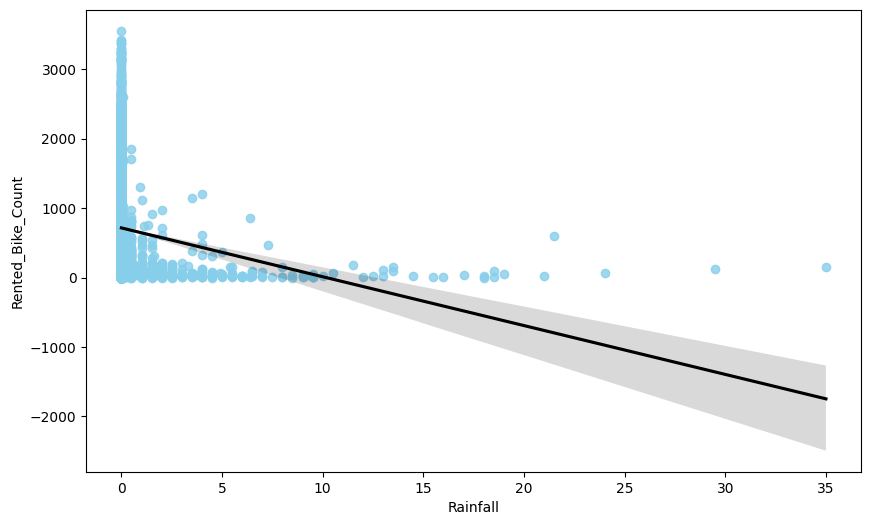

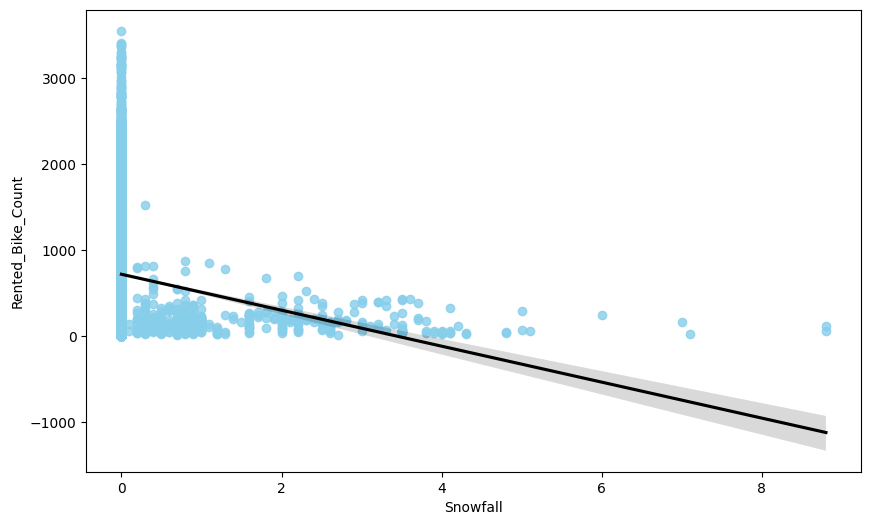

In [ ]:
# Printing the regression plot for all the numerical features
for col in numerical_features:
 fig,ax = plt.subplots(figsize = (10,6))
 sns.regplot(x = bsd_df[col],y = bsd_df['Rented_Bike_Count'],scatter_kws = {"color": 'skyblue'}, line_kws = {"color": "black"})

##### 1. Why did you pick the specific chart?

I used regression plots to visualize and assess the relationship between two variables, typically a dependent variable and an independent variable, and to understand the underlying trend or pattern in the data.

##### 2. What is/are the insight(s) found from the chart?

* Rented Bike Count rises as Temperature rises.
* Rented Bike Count falls as Humidity rises.
* Rented Bike Count rises as Wind Speed rises.
* Rented Bike Count rises as Visibility rises.
* Rented Bike Count rises as Dew Point Temperature rises.
* Rented Bike Count rises as Solar Radiation rises.
* Rented Bike Count falls as Rainfall rises.
* Rented Bike Count falls as Snowfall rises.

#### Correlation Heatmap

##### Checking of Correlation between variables

**Checking in OLS Model**
* OLS regression is a statistical technique used to estimate the association between a dependent variable and one or more independent variables.

In [ ]:
# Import the module
import statsmodels.api as sm
# Assign the 'x','y' value
X = bsd_df[[ 'Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']]
Y = bsd_df['Rented_Bike_Count']
bsd_df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day month weekdays_weekend  
0  No Holiday             Yes    12          Weekday  
1  No Holiday             Yes    12          Weekday  
2  No Holiday             Yes    12          Weekday  
3  No Holiday             Yes    12          Weekday  
4  No Holiday             Yes    12          Weekday

In [ ]:
# Add a constant column
X = sm.add_constant(X)
X

const  Temperature  Humidity  Wind_speed  Visibility  \
0       1.0         -5.2        37         2.2        2000   
1       1.0         -5.5        38         0.8        2000   
2       1.0         -6.0        39         1.0        2000   
3       1.0         -6.2        40         0.9        2000   
4       1.0         -6.0        36         2.3        2000   
...     ...          ...       ...         ...         ...   
8755    1.0          4.2        34         2.6        1894   
8756    1.0          3.4        37         2.3        2000   
8757    1.0          2.6        39         0.3        1968   
8758    1.0          2.1        41         1.0        1859   
8759    1.0          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

In [ ]:
## Fit a OLS model 
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:23:16   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X.corr()

const  Temperature  Humidity  Wind_speed  Visibility  \
const                    NaN          NaN       NaN         NaN         NaN   
Temperature              NaN     1.000000  0.159371   -0.036252    0.034794   
Humidity                 NaN     0.159371  1.000000   -0.336683   -0.543090   
Wind_speed               NaN    -0.036252 -0.336683    1.000000    0.171507   
Visibility               NaN     0.034794 -0.543090    0.171507    1.000000   
Dew_point_temperature    NaN     0.912798  0.536894   -0.176486   -0.176630   
Solar_Radiation          NaN     0.353505 -0.461919    0.332274    0.149738   
Rainfall                 NaN     0.050282  0.236397   -0.019674   -0.167629   
Snowfall                 NaN    -0.218405  0.108183   -0.003554   -0.121695   

                       Dew_point_temperature  Solar_Radiation  Rainfall  \
const                                    NaN              NaN       NaN   
Temperature                         0.912798         0.353505  0.050282   
Humidity                            0.536894        -0.461919  0.236397   
Wind_speed                         -0.176486         0.332274 -0.019674   
Visibility                         -0.176630         0.149738 -0.167629   
Dew_point_temperature               1.000000         0.094381  0.125597   
Solar_Radiation                     0.094381         1.000000 -0.074290   
Rainfall                            0.125597        -0.074290  1.000000   
Snowfall                           -0.150887        -0.072301  0.008500   

                       Snowfall  
const                       NaN  
Temperature           -0.218405  
Humidity               0.108183  
Wind_speed            -0.003554  
Visibility            -0.121695  
Dew_point_temperature -0.150887  
Solar_Radiation       -0.072301  
Rainfall               0.008500  
Snowfall               1.000000

##### Heatmap

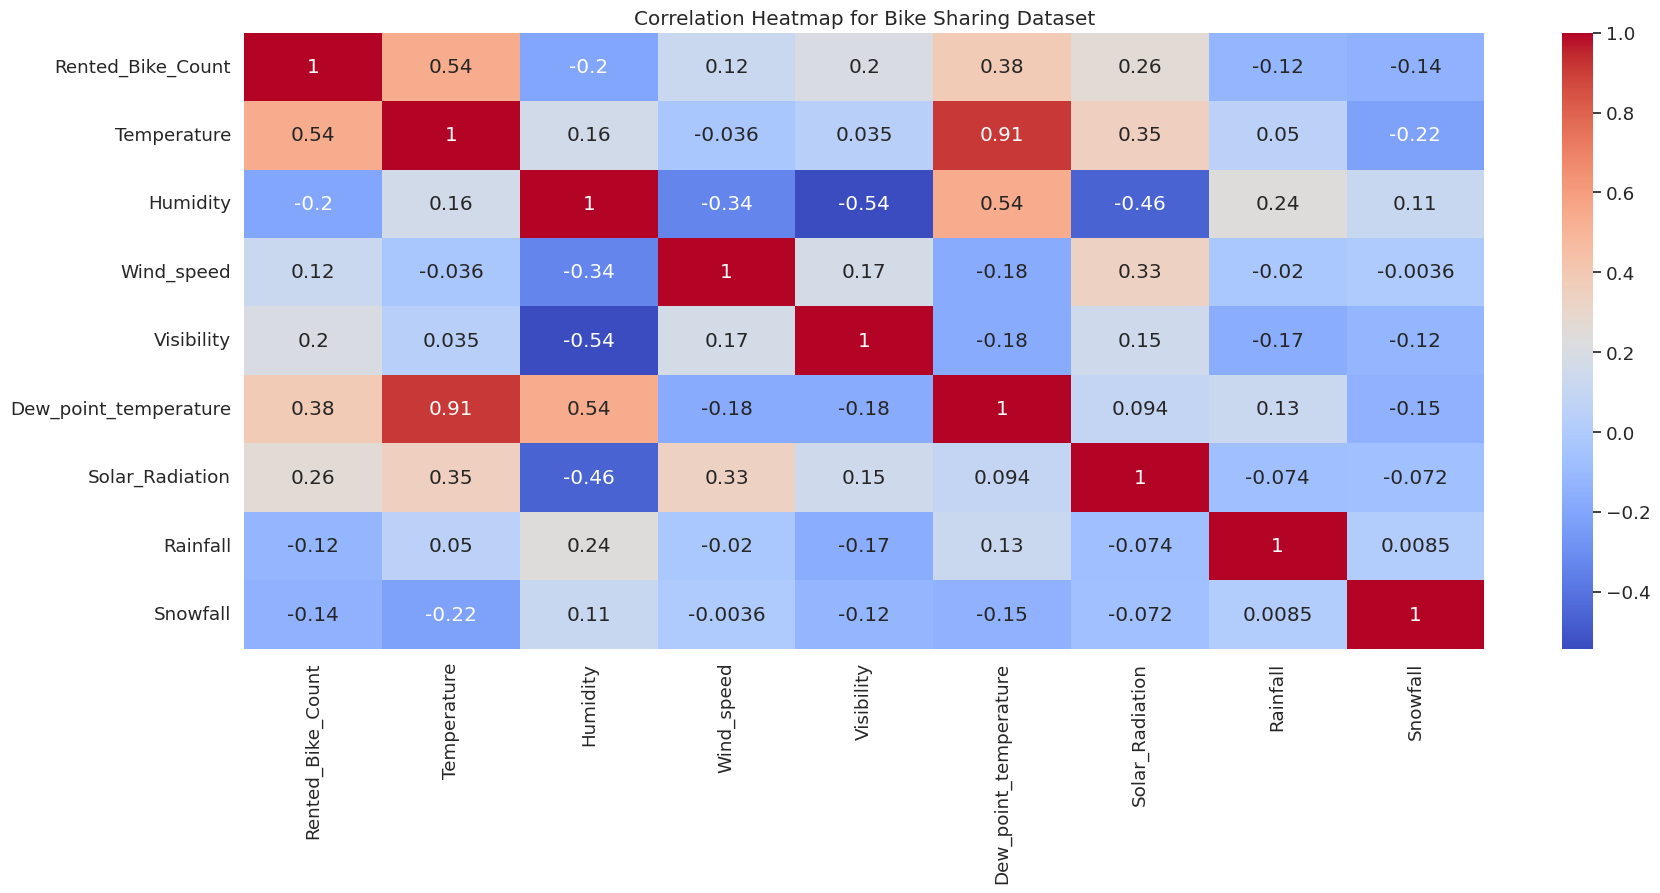

In [ ]:
# Create correlation matrix
corr = bsd_df.corr()

# Create heatmap
sns.set(font_scale = 1.2)
plt.figure(figsize = (20, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap for Bike Sharing Dataset')
plt.show()

##### 1. Why did you pick the specific chart?

I used a heatmap to visually represent the correlation or relationship between different variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

**By looking at the heatmap, we can notice that the variables which have the highest positive correlation with the Rented Bike Count (Target Variable) are:**
* Temperature
* Dew point temperature
* Solar radiation

**On the other hand, the variables that have the highest negative correlation with Rented Bike Count are:**
* Humidity
* Snowfall
* Rainfall

**The correlation heatmap shows a strong positive correlation of 0.91 between the 'Temperature' and 'Dew point temperature' columns. Therefore, removing the 'Dew point temperature(°C)' column would not significantly impact the analysis outcome since the two variables have similar variations.**

In [ ]:
# Drop the Dew point temperature column
bsd_df = bsd_df.drop(['Dew_point_temperature'],axis = 1)

In [ ]:
bsd_df.info

<bound method DataFrame.info of       Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                   254    0         -5.2        37         2.2        2000   
1                   204    1         -5.5        38         0.8        2000   
2                   173    2         -6.0        39         1.0        2000   
3                   107    3         -6.2        40         0.9        2000   
4                    78    4         -6.0        36         2.3        2000   
...                 ...  ...          ...       ...         ...         ...   
8755               1003   19          4.2        34         2.6        1894   
8756                764   20          3.4        37         2.3        2000   
8757                694   21          2.6        39         0.3        1968   
8758                712   22          2.1        41         1.0        1859   
8759                584   23          1.9        43         1.3        1909   

      Solar_Radiati

#### Pair Plot 

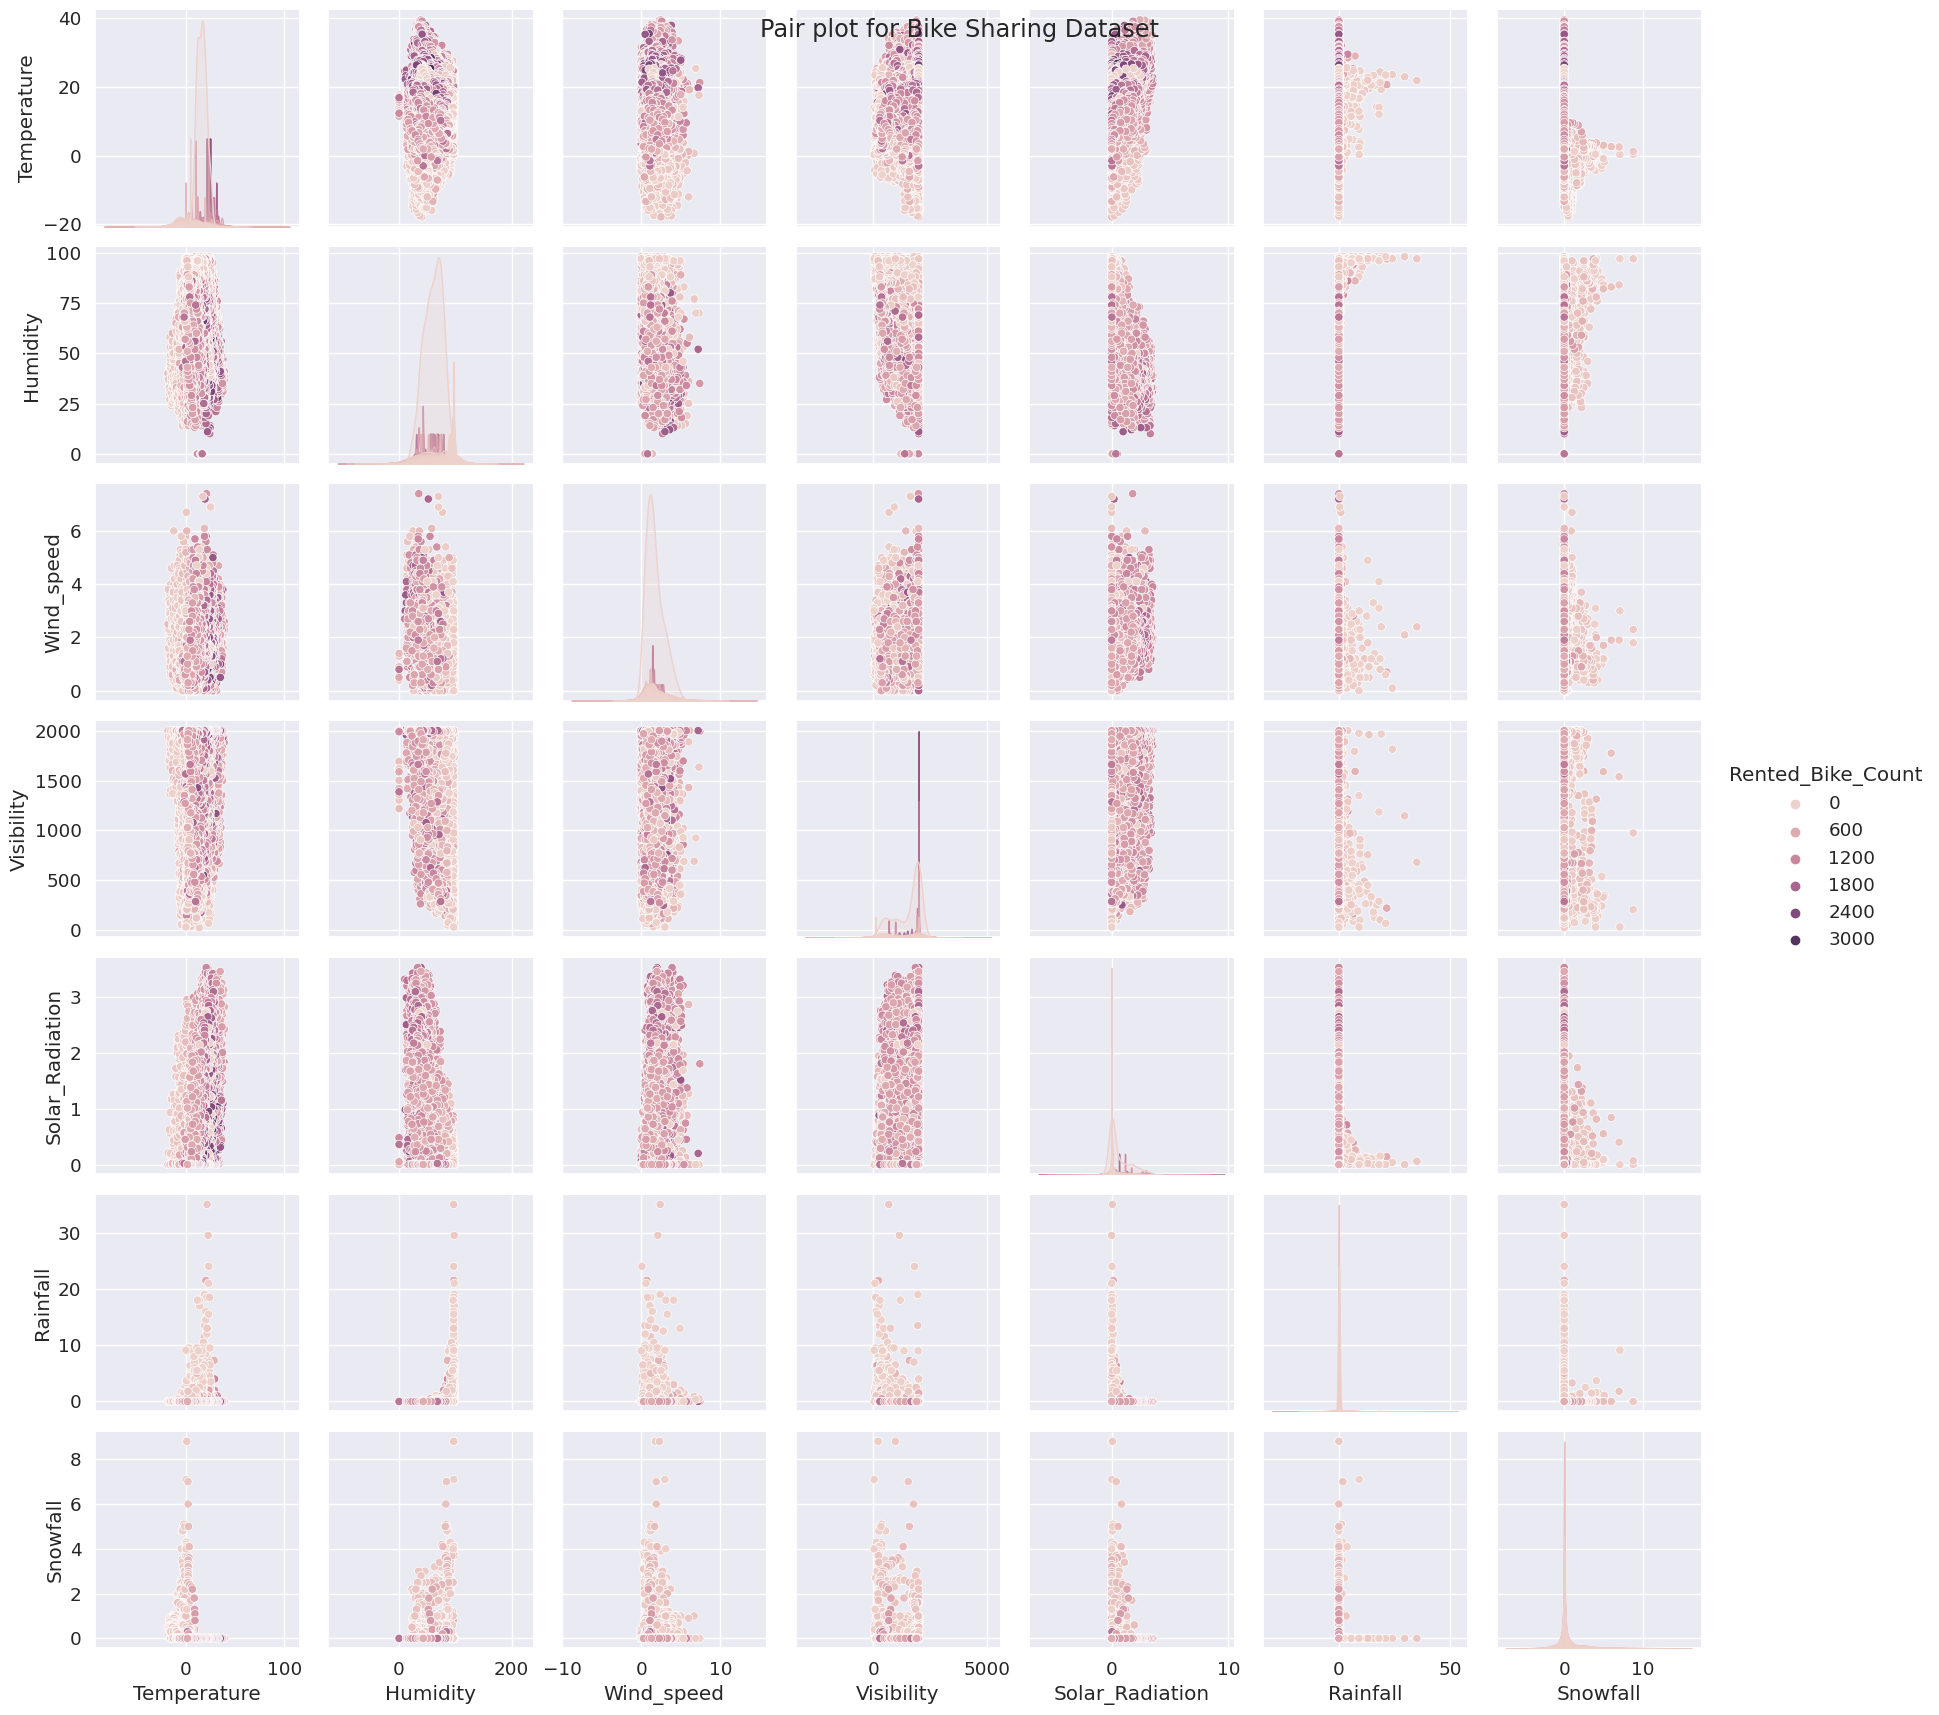

In [ ]:
# Create pair plot
sns.pairplot(bsd_df, hue ='Rented_Bike_Count')
plt.suptitle('Pair plot for Bike Sharing Dataset')
plt.show()

##### 1. Why did you pick the specific chart?

I used pairplot to visualize the pairwise relationships between multiple variables in a dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Hypothetical Statement - 1. Holidays have a significant effect on the rented bikes count.
* Hypothetical Statement - 2. Seasons have a significant effect on the rented bikes count.
* Hypothetical Statement - 3. Day-night have a significant effect on the rented bikes count.

### Hypothetical Statement - 1. Holidays have a significant effect on the rented bikes count

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0):** There is no significant difference in the mean rented bike counts between holidays and non-holidayss.

* **Alternative Hypothesis (HA):** There is a significant difference in the mean rented bike counts between holidays and non-holidays.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Extract rented bike counts for holidays and non-holidays
holiday_counts = bsd_df[bsd_df['Holiday'] =='Holiday']['Rented_Bike_Count']
non_holiday_counts = bsd_df[bsd_df['Holiday'] == 'No Holiday']['Rented_Bike_Count']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(holiday_counts, non_holiday_counts)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
 print("Alternate hypothesis - There is a significant difference in the mean rented bike counts between holidays and non-holidays.")
else:
 print("Null hypothesis - There is no significant difference in the mean rented bike counts between holidays and non-holidays.")

T-statistic: -6.7874340454159166
P-value: 1.2156443235024855e-11
Alternate hypothesis - There is a significant difference in the mean rented bike counts between holidays and non-holidays.


##### Which statistical test have you done to obtain P-Value?

The two-sample t-test is used to obtain the P-value.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen here to test the hypothesis. Because, it is a statistical test that can be used to compare the means of two independent samples. In this case, we wanted to compare the mean rented bike counts between the Holiday and Non-holiday, which are two independent samples.

### Hypothetical Statement - 2. Seasons have a significant effect on the rented bikes count.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0):** There is no significant difference in the mean rented bike counts among the seasons.

* **Alternative Hypothesis (HA):** There is a significant difference in the mean rented bike counts among the seasons.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Extract rented bike counts for different Seasons
summer_counts = bsd_df[bsd_df['Seasons'] == 'Summer']['Rented_Bike_Count']
winter_counts = bsd_df[bsd_df['Seasons'] == 'Winter']['Rented_Bike_Count']
spring_counts = bsd_df[bsd_df['Seasons'] == 'Spring']['Rented_Bike_Count']
autumn_counts = bsd_df[bsd_df['Seasons'] == 'Autumn']['Rented_Bike_Count']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(summer_counts, winter_counts, spring_counts, autumn_counts)

# Print the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
 print("Alternate hypothesis - There is a significant difference in the mean rented bike counts among the seasons.")
else:
 print("Null hypothesis - There is no significant difference in the mean rented bike counts among the seasons.")

F-statistic: 776.4678149879508
P-value: 0.0
Alternate hypothesis - There is a significant difference in the mean rented bike counts among the seasons.


##### Which statistical test have you done to obtain P-Value?

The one-way ANOVA is used to obtain the P-value.

##### Why did you choose the specific statistical test?

Since we are testing for differences between the means of more than two groups (four seasons in this case), ANOVA is an appropriate choice. ANOVA calculates the F-statistic, which compares the variability between groups with the variability within groups.

### Hypothetical Statement - 3. Weekdays and Weekend have a significant effect on the rented bikes count.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0):** There is no significant difference in the mean rented bike counts between Weekdays and Weekend.

* **Alternative Hypothesis (HA):** There is a significant difference in the mean rented bike counts between Weekdays and Weekend.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Extract rented bike counts for day and night
weekday_count = bsd_df[bsd_df['weekdays_weekend'] == 'Weekday']['Rented_Bike_Count']
weekend_count = bsd_df[bsd_df['weekdays_weekend'] == 'Weekend']['Rented_Bike_Count']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(weekday_count, weekend_count)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
 print("Alternate hypothesis - There is a significant difference in the mean rented bike counts between Weekdays and Weekend.")
else:
 print("Null hypothesis - There is no significant difference in the mean rented bike counts between Weekdays and Weekend.")

T-statistic: 3.4150448192415523
P-value: 0.0006406092926737229
Alternate hypothesis - There is a significant difference in the mean rented bike counts between Weekdays and Weekend.


##### Which statistical test have you done to obtain P-Value?

The two-sample t-test is used to obtain the P-value.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen here to test the hypothesis. Because, it is a statistical test that can be used to compare the means of two independent samples. In this case, we wanted to compare the mean rented bike counts between different temperature levels, which are two independent samples.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Missing Values/Null Values Count
bsd_df.isnull().sum()
bsd_df.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekdays_weekend     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing entries found.

### 2. Handling Outliers

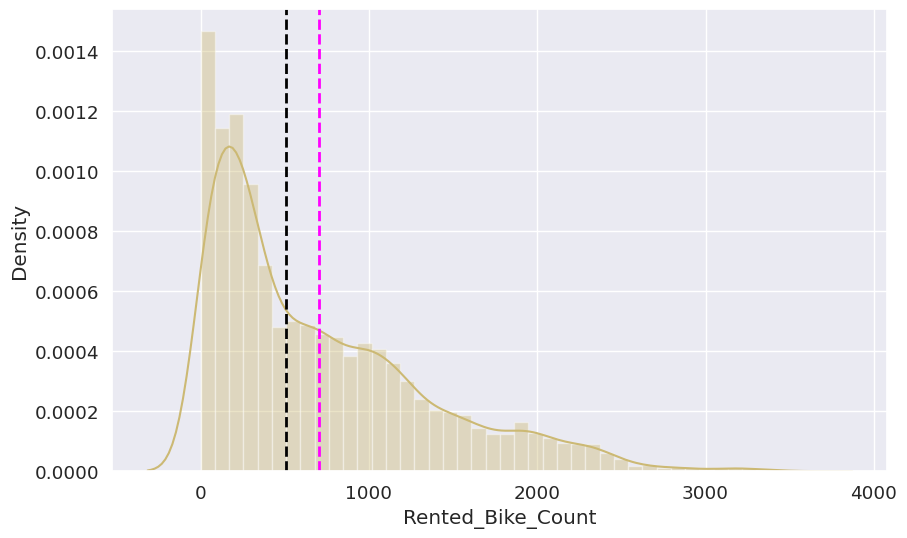

In [ ]:
# Distribution plot of Rented Bike Count
plt.figure(figsize = (10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax = sns.distplot(bsd_df['Rented_Bike_Count'],hist = True ,color = "y")
ax.axvline(bsd_df['Rented_Bike_Count'].mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax.axvline(bsd_df['Rented_Bike_Count'].median(), color = 'black', linestyle = 'dashed', linewidth = 2)
plt.show()

According to the graph, the Rented Bike Count is moderately skewed to the right. Linear regression assumes that the dependent variable is normally distributed, so it is necessary to transform the data to make it normal.

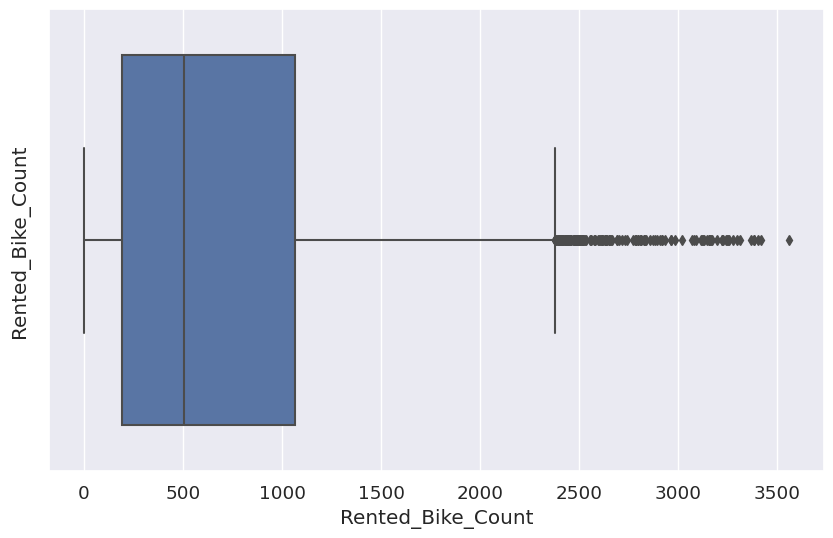

In [ ]:
# Boxplot of Rented Bike Count to check outliers
plt.figure(figsize = (10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x = bsd_df['Rented_Bike_Count'])
plt.show()

In the above boxplot, we can see that outliers have been detected in the Rented Bike Count column.

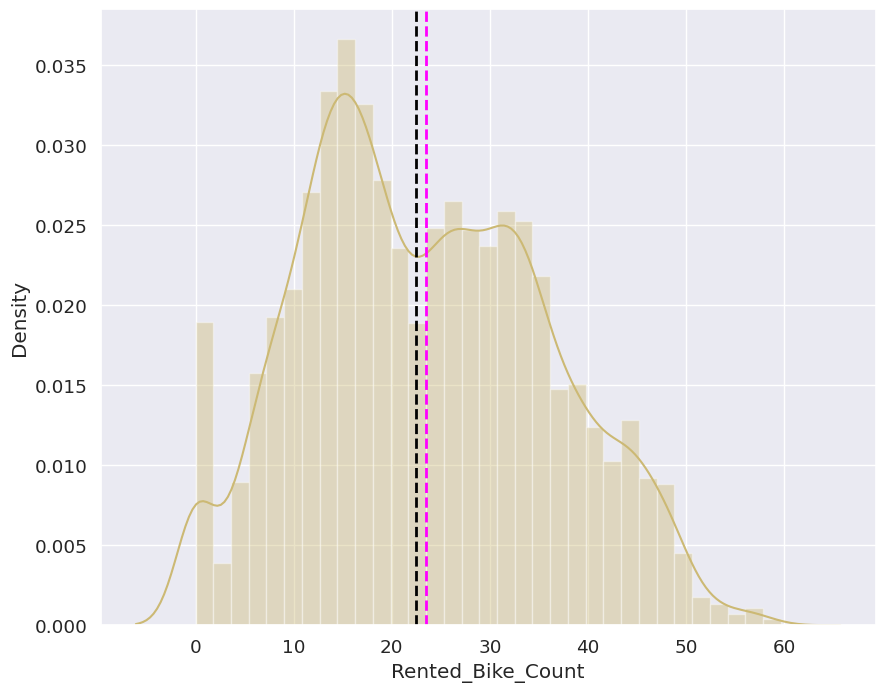

In [ ]:
# Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize = (10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax = sns.distplot(np.sqrt(bsd_df['Rented_Bike_Count']), color = "y")
ax.axvline(np.sqrt(bsd_df['Rented_Bike_Count']).mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax.axvline(np.sqrt(bsd_df['Rented_Bike_Count']).median(), color = 'black', linestyle = 'dashed', linewidth = 2)

plt.show()

After applying the general rule of taking the square root of skewed variables to make them more normal, the distribution of the skewed Rented Bike Count variable becomes almost normal.

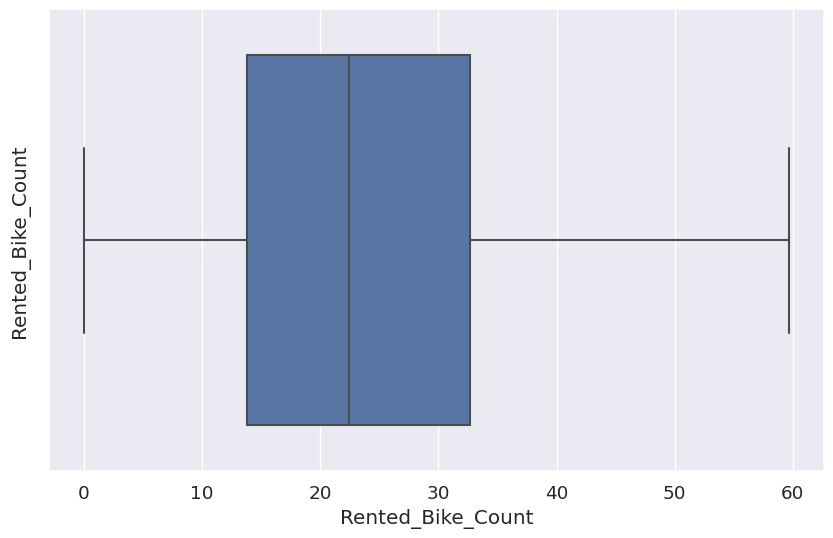

In [ ]:
# After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize = (10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x = np.sqrt(bsd_df['Rented_Bike_Count']))
plt.show()

No more outliers detected.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Using the square root transformation as an outlier treatment technique for skewed variables is not a common approach. The square root transformation is primarily used to reduce the skewness of data and make it more symmetric, but it is not specifically designed for outlier treatment. However, it can indirectly help in mitigating the influence of outliers by reducing their impact on the overall distribution.

### 3. Categorical Encoding

Datasets can have diverse values, including categorical ones. To utilize categorical values effectively in programming, we generate dummy variables.

In [ ]:
# Assign all catagoriacal features to a variable
categorical_features = list(bsd_df.select_dtypes(['object','category']).columns)
categorical_features = pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

##### One Hot encoding

In [ ]:
#creat a copy
bsd_df_copy = bsd_df

def one_hot_encoding(data, column):
 data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)], axis = 1)
 data = data.drop([column], axis = 1)
 return data

for col in categorical_features:
 bsd_df_copy = one_hot_encoding(bsd_df_copy, col)
bsd_df_copy.head()  

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  month_4  month_5  \
0              0.0       0.0       0.0       0       0  ...        0        0   
1              0.0       0.0       0.0       1       0  ...        0        0   
2              0.0       0.0       0.0       0       1  ...        0        0   
3              0.0       0.0       0.0       0       0  ...        0        0   
4              0.0       0.0       0.0       0       0  ...        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0        0        0        0        0         0         0         1   
1        0        0        0        0         0         0         1   
2        0        0        0        0         0         0         1   
3        0        0        0        0         0         0         1   
4        0        0        0        0         0         0         1   

   weekdays_weekend_Weekend  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 48 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-Hot Encoding was used all the catagorical features as they have a nominal nature where there is no order or hierarchy between categories. In One-Hot Encoding, each category is represented as a binary column where a value of 1 in a column indicates the presence of that category in the sample and 0 otherwise.

### 8. Data Splitting

In [ ]:
# Assign the value in X and Y
X = bsd_df_copy.drop(columns = ['Rented_Bike_Count'], axis = 1)
y = np.sqrt(bsd_df_copy['Rented_Bike_Count'])

In [ ]:
X.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
0         -5.2        37         2.2        2000              0.0       0.0   
1         -5.5        38         0.8        2000              0.0       0.0   
2         -6.0        39         1.0        2000              0.0       0.0   
3         -6.2        40         0.9        2000              0.0       0.0   
4         -6.0        36         2.3        2000              0.0       0.0   

   Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  month_7  \
0       0.0       0       0       0  ...        0        0        0        0   
1       0.0       1       0       0  ...        0        0        0        0   
2       0.0       0       1       0  ...        0        0        0        0   
3       0.0       0       0       1  ...        0        0        0        0   
4       0.0       0       0       0  ...        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  weekdays_weekend_Weekend  
0        0        0         0         0         1                         0  
1        0        0         0         0         1                         0  
2        0        0         0         0         1                         0  
3        0        0         0         0         1                         0  
4        0        0         0         0         1                         0  

[5 rows x 47 columns]

In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
# Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6132, 47)
(2628, 47)


In [ ]:
bsd_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_Weekend'],
      dtype='object')

##### What data splitting ratio have you used and why? 

* I splitted the data in 70:30 ratio.
* The reason for using a 70:30 data splitting ratio is to ensure that the model has enough data to learn from during the training phase, while still having enough data to test the model's performance.

## ***7. ML Model Implementation***

### Linear Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Linear regression** is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, where the dependent variable can be predicted as a linear combination of the independent variables. The goal of linear regression is to find the best-fit line that minimizes the difference between the actual and predicted values. This technique is widely used for prediction, inference, and understanding the impact of independent variables on the dependent variable.

In [ ]:
# Linear Regression Implementation
lr = LinearRegression()
# Fit the Algorithm
lr.fit(X_train, y_train)
# Predict on the model
y_pred_lr = lr.predict(X_test)

In [ ]:
# Check the score
lr.score(X_train, y_train)

0.7735538545244831

In [ ]:
# Check the coefficeint
lr.coef_

array([ 5.06409442e-01, -1.31832585e-01, -2.95726531e-02,  9.94007084e-04,
        8.31713759e-01, -1.49348764e+00, -5.37062680e-02, -2.25126487e+00,
       -4.99006373e+00, -7.35905711e+00, -9.49479022e+00, -8.97758528e+00,
       -4.04211743e+00,  2.32874842e+00,  7.48265247e+00,  1.14220456e+00,
       -3.26382769e+00, -3.62210895e+00, -2.89996452e+00, -2.94011118e+00,
       -3.29743736e+00, -2.08789080e+00,  1.79520578e-01,  3.65430099e+00,
        1.00931648e+01,  6.65353785e+00,  5.83638625e+00,  6.16960119e+00,
        4.88538499e+00,  1.27464572e+00, -3.12529632e+09,  7.32848255e+09,
       -3.19597701e+09,  3.67478997e+00,  2.82525975e+01, -7.25154628e-01,
       -7.06806874e+07, -7.06806866e+07, -7.06806839e+07, -1.05244595e+10,
       -1.05244596e+10, -1.05244596e+10, -3.19597700e+09, -3.19597700e+09,
       -3.19597700e+09,  2.07090954e+00, -1.38817613e+00])

In [ ]:
# Get the X_train and X-test value
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [ ]:
# Calculate MSE
mse_lr = mean_squared_error((y_train), (y_pred_train_lr))
print("MSE :", mse_lr)

# Calculate RMSE
rmse_lr = np.sqrt(mse_lr)
print("RMSE :", rmse_lr)

# Calculate MAE
mae_lr = mean_absolute_error(y_train, y_pred_train_lr)
print("MAE :",mae_lr)

# Calculate R-squared score
r2_lr = r2_score((y_train), (y_pred_train_lr))
print("R Squared :",r2_lr)

# Calculate Adjusted R-squared score
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr)

MSE : 35.224265900543436
RMSE : 5.935003445706113
MAE : 4.479618816247486
R Squared : 0.7735538545244831
Adjusted R2 : 0.7694286728045803


Our R2 value is 0.77. This means our model is covering most of the varience.

In [ ]:
# Storing the test set metrics value in a dataframe for later comparison
dict1 = {'Model':'Linear regression ',
         'MAE':round((mae_lr),3),
         'MSE':round((mse_lr),3),
         'RMSE':round((rmse_lr),3),
         'R2_score':round((r2_lr),3),
         'Adjusted R2':round((Adjusted_R2_lr ),2)}
training_df = pd.DataFrame(dict1,index = [1])

In [ ]:
# Calculate MSE
mse_lr = mean_squared_error((y_test), (y_pred_test_lr))
print("MSE :", mse_lr)

# Calculate RMSE
rmse_lr = np.sqrt(mse_lr)
print("RMSE :", rmse_lr)

# Calculate MAE
mae_lr = mean_absolute_error(y_test, y_pred_test_lr)
print("MAE :",mae_lr)

# Calculate R-squared score
r2_lr = r2_score((y_test), (y_pred_test_lr))
print("R Squared :",r2_lr)

# Calculate Adjusted R-squared score
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr)

MSE : 33.34785137966983
RMSE : 5.774759854718621
MAE : 4.428339821579641
R Squared : 0.7828888869222996
Adjusted R2 : 0.77893376199414


In [ ]:
# Storing the test set metrics value in a dataframe for later comparison
dict2 = {'Model':'Linear regression ',
         'MAE':round((mae_lr),3),
         'MSE':round((mse_lr),3),
         'RMSE':round((rmse_lr),3),
         'R2_score':round((r2_lr),3),
         'Adjusted R2':round((Adjusted_R2_lr ),2)}
test_df = pd.DataFrame(dict2,index = [1])

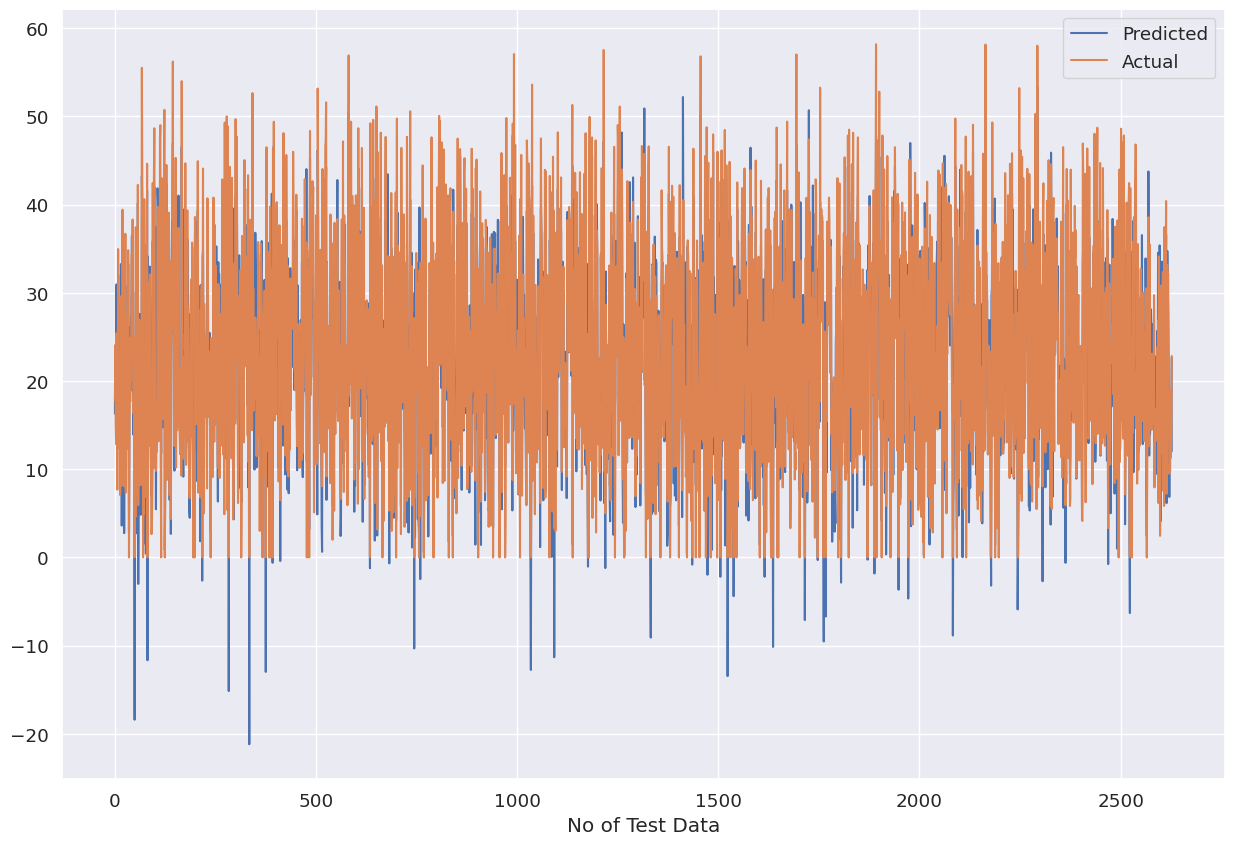

In [ ]:
# Plot the figure
plt.figure(figsize = (15,10))
plt.plot(y_pred_test_lr)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

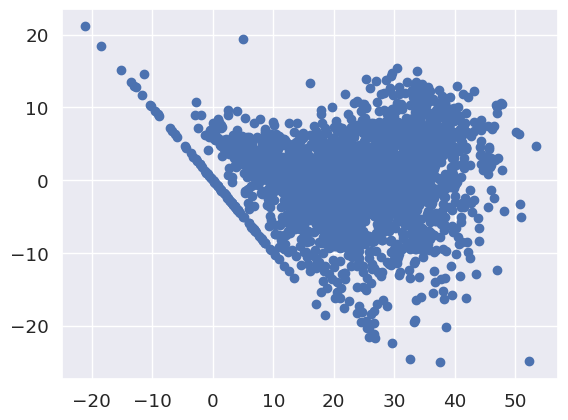

In [ ]:
# Visualize the model's performance on the test set
plt.scatter((y_pred_test_lr),(y_test)-(y_pred_test_lr))

### Lasso Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Lasso regression** is a linear regression technique that incorporates a regularization term, known as the L1 penalty, into the model. It is used for feature selection and regularization by adding a penalty term based on the absolute values of the coefficients. This penalty encourages sparse solutions by shrinking some coefficients to zero, effectively performing automatic feature selection. Lasso regression helps mitigate overfitting and can handle high-dimensional datasets by promoting simpler models with fewer features.

In [ ]:
# Lasso Regression Implementation
la = Lasso(alpha = 1.0, max_iter = 3000)
# Fit the Algorithm
la.fit(X_train, y_train)
# Predict on the model
y_pred_la = la.predict(X_test)

In [ ]:
# Check the score
la.score(X_train, y_train)

0.4046891968249039

In [ ]:
# Check the coefficeint
la.coef_

array([ 6.09828786e-01, -1.82398632e-01,  0.00000000e+00,  1.83780475e-04,
       -0.00000000e+00, -5.60416091e-01,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [ ]:
# Get the X_train and X-test value
y_pred_train_la = la.predict(X_train)
y_pred_test_la = la.predict(X_test)

In [ ]:
# Calculate MSE
mse_la = mean_squared_error((y_train), (y_pred_train_la))
print("MSE :",mse_la)

# Calculate RMSE
rmse_la = np.sqrt(mse_la)
print("RMSE :",mse_la)


# Calculate MAE
mae_la = mean_absolute_error(y_train, y_pred_train_la)
print("MAE :",mae_la)

# Calculate R-squared score
r2_la = r2_score((y_train), (y_pred_train_la))
print("R Squared :",r2_la)

# Calculate Adjusted R-squared score
Adjusted_R2_la = (1-(1-r2_score(y_train, y_pred_train_la))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_la)

MSE : 92.60208859140351
RMSE : 92.60208859140351
MAE : 7.286126565995105
R Squared : 0.4046891968249039
Adjusted R2 : 0.39384438761977625


In [ ]:
# Storing the test set metrics value in a dataframe for later comparison
dict1 = {'Model':'Lasso regression ',
         'MAE':round((mae_la),3),
         'MSE':round((mse_la),3),
         'RMSE':round((rmse_la),3),
         'R2_score':round((r2_la),3),
         'Adjusted R2':round((Adjusted_R2_la ),2)}
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
# Calculate MSE
mse_la = mean_squared_error((y_test), (y_pred_test_la))
print("MSE :",mse_la)

# Calculate RMSE
rmse_la = np.sqrt(mse_la)
print("RMSE :",mse_la)


# Calculate MAE
mae_la = mean_absolute_error(y_test, y_pred_test_la)
print("MAE :",mae_la)

# Calculate R-squared score
r2_la = r2_score((y_test), (y_pred_test_la))
print("R Squared :",r2_la)

# Calculate Adjusted R-squared score
Adjusted_R2_la = (1-(1-r2_score(y_test, y_pred_test_la))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_la)


MSE : 93.34397972819944
RMSE : 93.34397972819944
MAE : 7.3358839873346975
R Squared : 0.3922842252365728
Adjusted R2 : 0.3812134339908825


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2 = {'Model':'Lasso regression ',
         'MAE':round((mae_la),3),
         'MSE':round((mse_la),3),
         'RMSE':round((rmse_la),3),
         'R2_score':round((r2_la),3),
         'Adjusted R2':round((Adjusted_R2_la ),2)}
test_df = test_df.append(dict2,ignore_index = True)

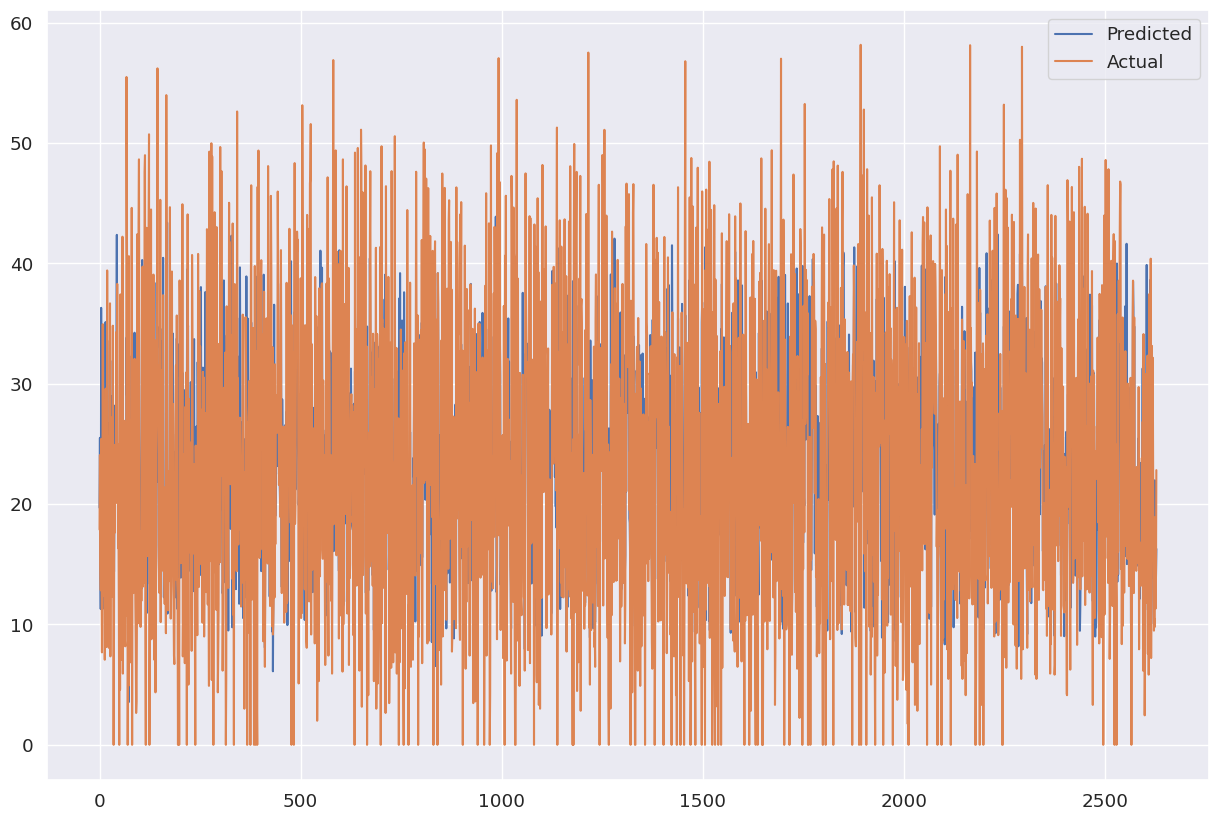

In [ ]:
#Plot the figure
plt.figure(figsize = (15,10))
plt.plot(np.array(y_pred_test_la))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

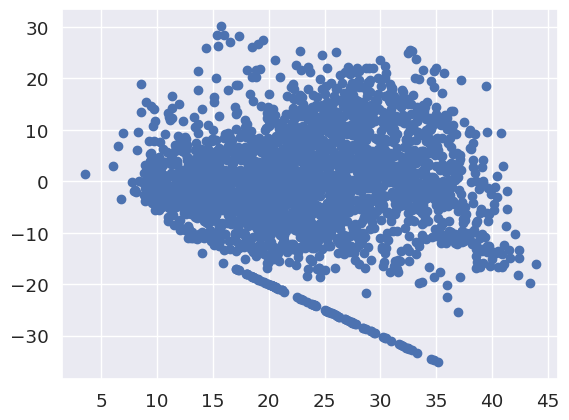

In [ ]:
# Visualize the model's performance on the test set
plt.scatter((y_pred_test_la),(y_test-y_pred_test_la))

### Ridge Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Ridge Regression** is a regularization technique used in linear regression to address the issue of multicollinearity (high correlation) among predictor variables. It adds a penalty term to the cost function, which helps in reducing the impact of highly correlated variables by shrinking their coefficients towards zero. This regularization term, controlled by a hyperparameter called the regularization parameter or alpha, helps to prevent overfitting and improves the stability and generalization performance of the model.

In [ ]:
# ML Model - 1 Implementation
ridge= Ridge(alpha=0.1)
# Fit the Algorithm
ridge.fit(X_train,y_train)
# Predict on the model
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Check the score
ridge.score(X_train, y_train)

0.7735537693580057

In [ ]:
# Check the coefficeint
ridge.coef_

array([ 5.06580815e-01, -1.31863483e-01, -2.91579272e-02,  9.94234604e-04,
        8.29417154e-01, -1.49342721e+00, -5.34296303e-02, -2.24793885e+00,
       -4.98561445e+00, -7.35377790e+00, -9.48826194e+00, -8.97122424e+00,
       -4.03778011e+00,  2.33104910e+00,  7.48329908e+00,  1.14556991e+00,
       -3.25797376e+00, -3.61583444e+00, -2.89382743e+00, -2.93429870e+00,
       -3.29183722e+00, -2.08337086e+00,  1.82571447e-01,  3.65525375e+00,
        1.00907910e+01,  6.65259274e+00,  5.83547568e+00,  6.16919964e+00,
        4.88542525e+00,  1.27610362e+00, -4.43403746e-01, -1.17453780e+00,
       -4.93087337e+00,  3.67390855e+00,  2.82368476e+01, -7.26303033e-01,
       -1.55836410e+00, -7.56703151e-01,  1.87166351e+00,  4.35572982e+00,
       -1.52180550e+00, -4.00846211e+00,  6.79680810e-01,  3.27295455e+00,
        2.59617955e+00,  2.06912501e+00, -1.38774055e+00])

In [ ]:
# Get the X_train and X-test value
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [ ]:
# Calculate MSE
mse_ridge = mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",mse_ridge)

# Calculate RMSE
rmse_ridge = np.sqrt(mse_ridge)
print("RMSE :",mse_ridge)


# Calculate MAE
mae_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",mae_ridge)

# Calculate R-squared score
r2_ridge = r2_score((y_train), (y_pred_train_ridge))
print("R Squared :",r2_ridge)

# Calculate Adjusted R-squared score
Adjusted_R2_ridge = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_ridge)

MSE : 35.224279148402616
RMSE : 35.224279148402616
MAE : 4.479732943443683
R Squared : 0.7735537693580057
Adjusted R2 : 0.7694285860866206


In [ ]:
# Storing the test set metrics value in a dataframe for later comparison
dict1 = {'Model':'Ridge regression ',
         'MAE':round((mae_ridge),3),
         'MSE':round((mse_ridge),3),
         'RMSE':round((rmse_ridge),3),
         'R2_score':round((r2_ridge),3),
         'Adjusted R2':round((Adjusted_R2_ridge),2)}
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
# Calculate MSE
mse_ridge = mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",mse_ridge)

# Calculate RMSE
rmse_ridge = np.sqrt(mse_ridge)
print("RMSE :",mse_ridge)


# Calculate MAE
mae_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",mae_ridge)

# Calculate R-squared score
r2_ridge = r2_score((y_train), (y_pred_train_ridge))
print("R Squared :",r2_ridge)

# Calculate Adjusted R-squared score
Adjusted_R2_ridge = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_ridge)

MSE : 35.224279148402616
RMSE : 35.224279148402616
MAE : 4.479732943443683
R Squared : 0.7735537693580057
Adjusted R2 : 0.7694285860866206


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2 = {'Model':'Ridge regression ',
         'MAE':round((mae_ridge),3),
         'MSE':round((mse_ridge),3),
         'RMSE':round((rmse_ridge),3),
         'R2_score':round((r2_ridge),3),
         'Adjusted R2':round((Adjusted_R2_ridge),2)}
test_df = test_df.append(dict2,ignore_index = True)

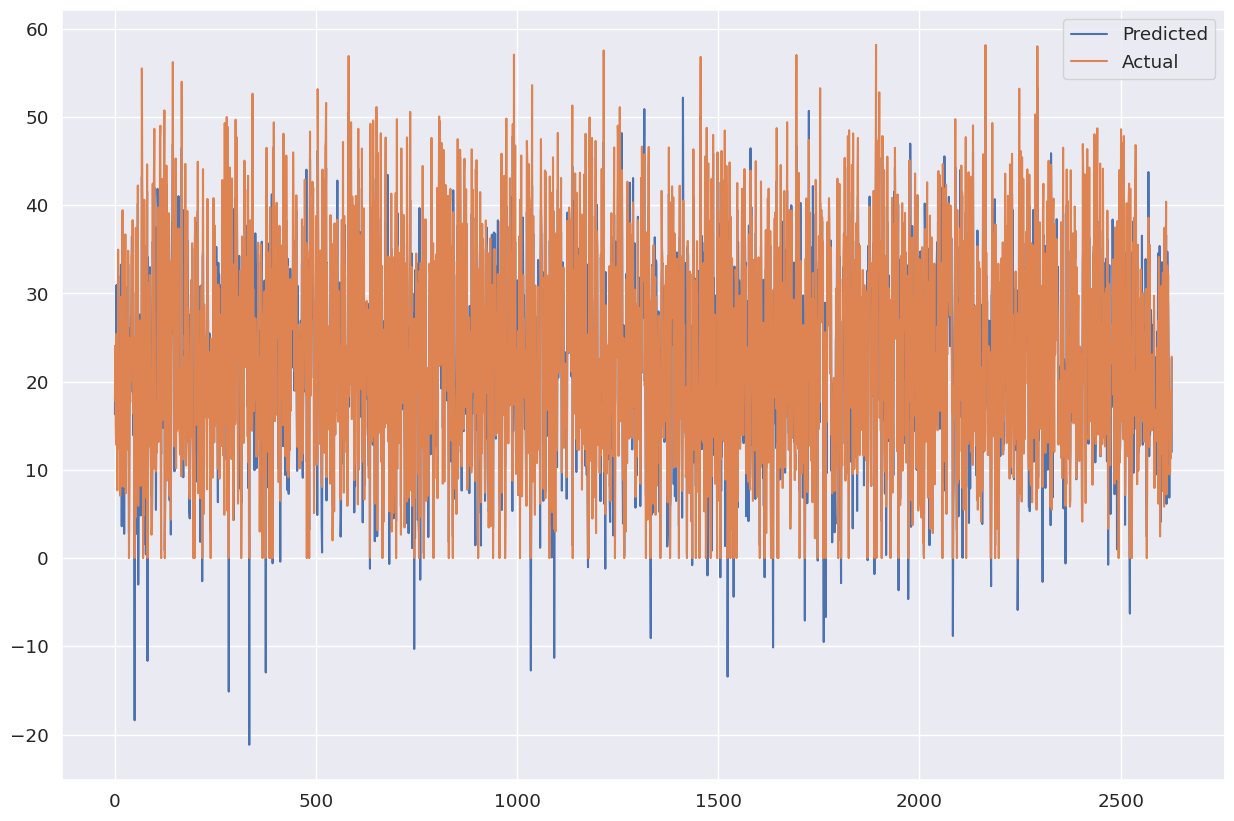

In [ ]:
#Plot the figure
plt.figure(figsize = (15,10))
plt.plot(np.array(y_pred_test_ridge))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

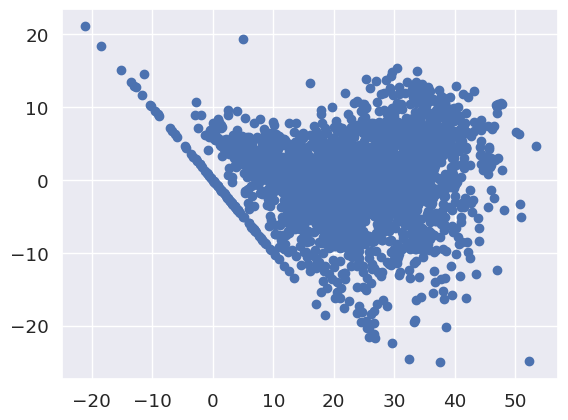

In [ ]:
# Visualize the model's performance on the test set
plt.scatter((y_pred_test_ridge),(y_test-y_pred_test_ridge))

### Elastic Net Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Elastic Net Regression** is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization techniques. It is used to handle situations where there are high-dimensional datasets with potential multicollinearity (correlation between predictors).
Elastic Net Regression is a flexible regression method that can effectively handle datasets with multicollinearity by simultaneously performing feature selection and regularization through the combination of Lasso and Ridge penalties.

In [ ]:
# ML Model - 1 Implementation
en= ElasticNet(alpha=0.1, l1_ratio=0.5)
# Fit the Algorithm
en.fit(X_train,y_train)
# Predict on the model
y_pred_en = en.predict(X_test)

In [ ]:
# Check the score
en.score(X_train, y_train)

0.629149447960897

In [ ]:
# Check the coefficeint
en.coef_

array([ 6.03671159e-01, -1.78661705e-01,  3.83608235e-01,  3.99507527e-04,
       -8.66456474e-01, -1.32730484e+00,  0.00000000e+00, -4.28776858e-01,
       -1.70595558e+00, -2.83609521e+00, -3.58095582e+00, -3.32139106e+00,
       -1.18072349e+00,  8.63578679e-01,  3.22526182e+00,  3.55543737e-01,
       -2.71104556e-01, -3.74876643e-01, -6.10434230e-02, -2.08979424e-01,
       -5.21696617e-01, -1.42233405e-01,  0.00000000e+00,  1.00871201e+00,
        3.63614995e+00,  2.25132989e+00,  1.71147750e+00,  2.19334244e+00,
        1.54201227e+00,  0.00000000e+00,  0.00000000e+00, -3.77494724e-01,
       -1.84600958e+00,  1.51343005e+00,  9.78128737e+00, -8.90338149e-01,
       -0.00000000e+00, -0.00000000e+00,  9.87303373e-01,  2.38076653e+00,
       -4.22219011e-01, -2.33486359e+00, -1.41712472e-01,  1.34673356e+00,
        1.28448087e+00,  9.31237543e-02, -6.74911070e-01])

In [ ]:
# Get the X_train and X-test value
y_pred_train_en = en.predict(X_train)
y_pred_test_en = en.predict(X_test)

In [ ]:
# Calculate MSE
mse_en = mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",mse_en)

# Calculate RMSE
rmse_en = np.sqrt(mse_en)
print("RMSE :",mse_en)


# Calculate MAE
mae_en = mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",mae_en)

# Calculate R-squared score
r2_en = r2_score((y_train), (y_pred_train_en))
print("R Squared :",r2_en)

# Calculate Adjusted R-squared score
Adjusted_R2_en = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_en)

MSE : 57.68673353638971
RMSE : 57.68673353638971
MAE : 5.799016174791626
R Squared : 0.629149447960897
Adjusted R2 : 0.6223936433307273


In [ ]:
# Storing the test set metrics value in a dataframe for later comparison
dict1 = {'Model':'Elastic Net regression ',
         'MAE':round((mae_en),3),
         'MSE':round((mse_en),3),
         'RMSE':round((rmse_en),3),
         'R2_score':round((r2_en),3),
         'Adjusted R2':round((Adjusted_R2_en),2)}
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
# Calculate MSE
mse_en = mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",mse_en)

# Calculate RMSE
rmse_en = np.sqrt(mse_en)
print("RMSE :",mse_en)


# Calculate MAE
mae_en = mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",mae_en)

# Calculate R-squared score
r2_en = r2_score((y_train), (y_pred_train_en))
print("R Squared :",r2_en)

# Calculate Adjusted R-squared score
Adjusted_R2_en = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_en)

MSE : 57.68673353638971
RMSE : 57.68673353638971
MAE : 5.799016174791626
R Squared : 0.629149447960897
Adjusted R2 : 0.6223936433307273


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2 = {'Model':'Elastic Net regression ',
         'MAE':round((mae_en),3),
         'MSE':round((mse_en),3),
         'RMSE':round((rmse_en),3),
         'R2_score':round((r2_en),3),
         'Adjusted R2':round((Adjusted_R2_en),2)}
test_df = test_df.append(dict2,ignore_index = True)

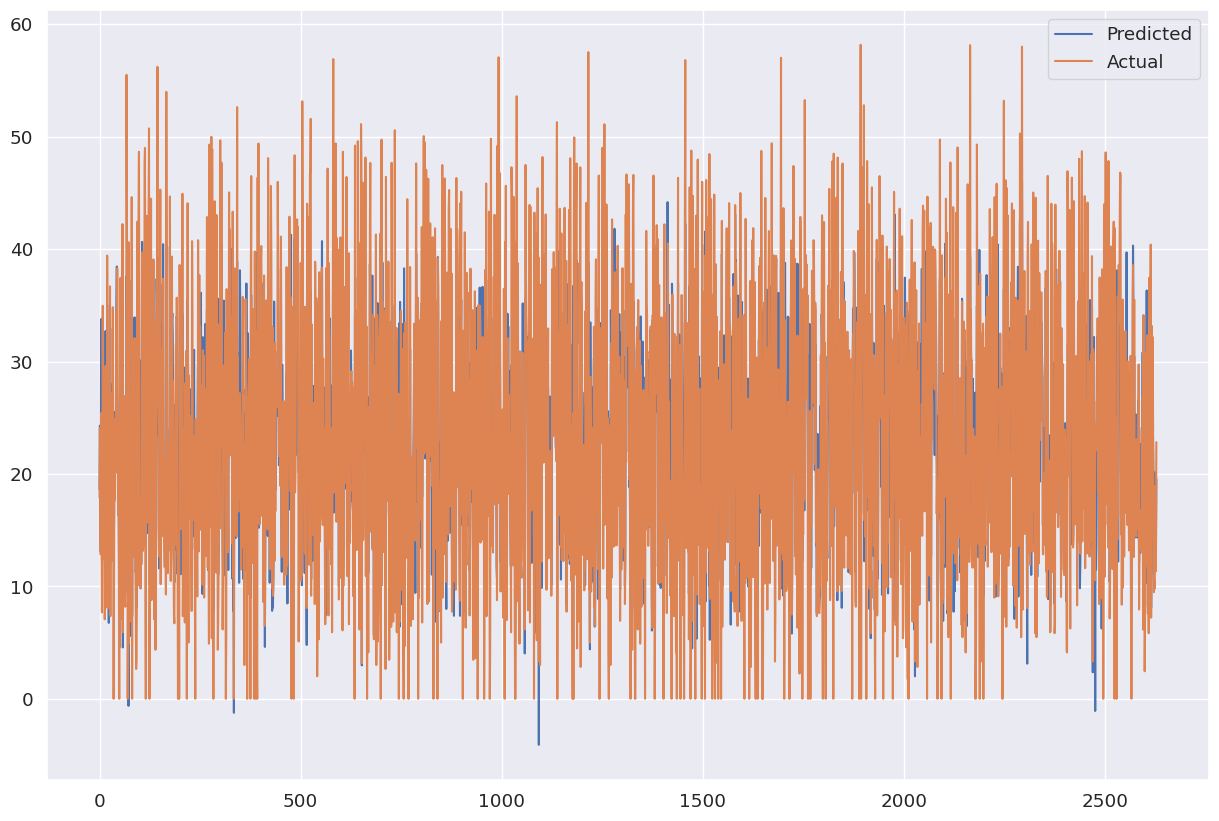

In [ ]:
#Plot the figure
plt.figure(figsize = (15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

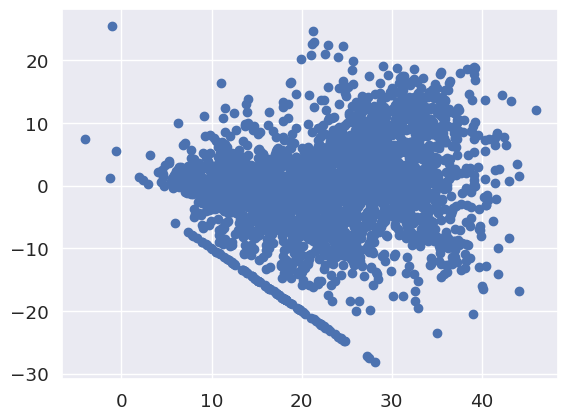

In [ ]:
# Visualize the model's performance on the test set
plt.scatter((y_pred_test_en),(y_test-y_pred_test_en))

### Decision Tree

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A **Decision Tree** is a supervised machine learning algorithm used for both classification and regression tasks. It is a tree-like model where each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents the outcome or prediction. The tree is built by recursively partitioning the data based on feature values to minimize impurity or maximize information gain. Decision Trees are interpretable, capable of handling both numerical and categorical data, and can capture non-linear relationships between features and the target variable. They are prone to overfitting, but techniques like pruning and ensemble methods can help mitigate this issue.

In [ ]:
# ML Model - 3 Implementation
dt = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 8, max_features = 9, max_leaf_nodes = 100,)
# Fit the Algorithm
dt.fit(X_train,y_train)
# Predict on the model
y_pred_dt = dt.predict(X_test)

In [ ]:
# Check the score
dt.score(X_train, y_train)

0.6806664083473983

In [ ]:
# Get the X_train and X-test value
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

In [ ]:
# Calculate MSE
mse_dt = mean_squared_error((y_train), (y_pred_train_dt))
print("MSE :",mse_dt)

# Calculate RMSE
rmse_dt = np.sqrt(mse_dt)
print("RMSE :",rmse_dt)


# Calculate MAE
mae_dt = mean_absolute_error(y_train, y_pred_train_dt)
print("MAE :",mae_dt)


# Calculate R-squared score
r2_dt = r2_score(y_train, y_pred_train_dt)
print("R2 :",r2_dt)

# Calculate Adjusted R-squared score
Adjusted_R2_dt = (1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_dt)

MSE : 49.67314113351933
RMSE : 7.047917503313963
MAE : 5.098634100860719
R2 : 0.6806664083473983
Adjusted R2 : 0.6748490909800835


In [ ]:
# Storing the test set metrics value in a dataframe for later comparison
dict1 = {'Model':'Decision Tree',
         'MAE':round((mae_dt),3),
         'MSE':round((mse_dt),3),
         'RMSE':round((rmse_dt),3),
         'R2_score':round((r2_dt),3),
         'Adjusted R2':round((Adjusted_R2_dt),2)}
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
# Calculate MSE
mse_dt = mean_squared_error((y_test), (y_pred_test_dt))
print("MSE :",mse_dt)

# Calculate RMSE
rmse_dt = np.sqrt(mse_dt)
print("RMSE :",rmse_dt)


# Calculate MAE
mae_dt = mean_absolute_error(y_test, y_pred_test_dt)
print("MAE :",mae_dt)


# Calculate R-squared score
r2_dt = r2_score(y_test, y_pred_test_dt)
print("R2 :",r2_dt)

# Calculate Adjusted R-squared score
Adjusted_R2_dt = (1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_dt)

MSE : 52.41254949098464
RMSE : 7.239651199538873
MAE : 5.288160826373112
R2 : 0.6587682117905495
Adjusted R2 : 0.6525519737882843


In [ ]:
# Storing the test set metrics value in a dataframe for later comparison
dict2 = {'Model':'Decision Tree',
         'MAE':round((mae_dt),3),
         'MSE':round((mse_dt),3),
         'RMSE':round((rmse_dt),3),
         'R2_score':round((r2_dt),3),
         'Adjusted R2':round((Adjusted_R2_dt),2)}
test_df = test_df.append(dict2,ignore_index = True)

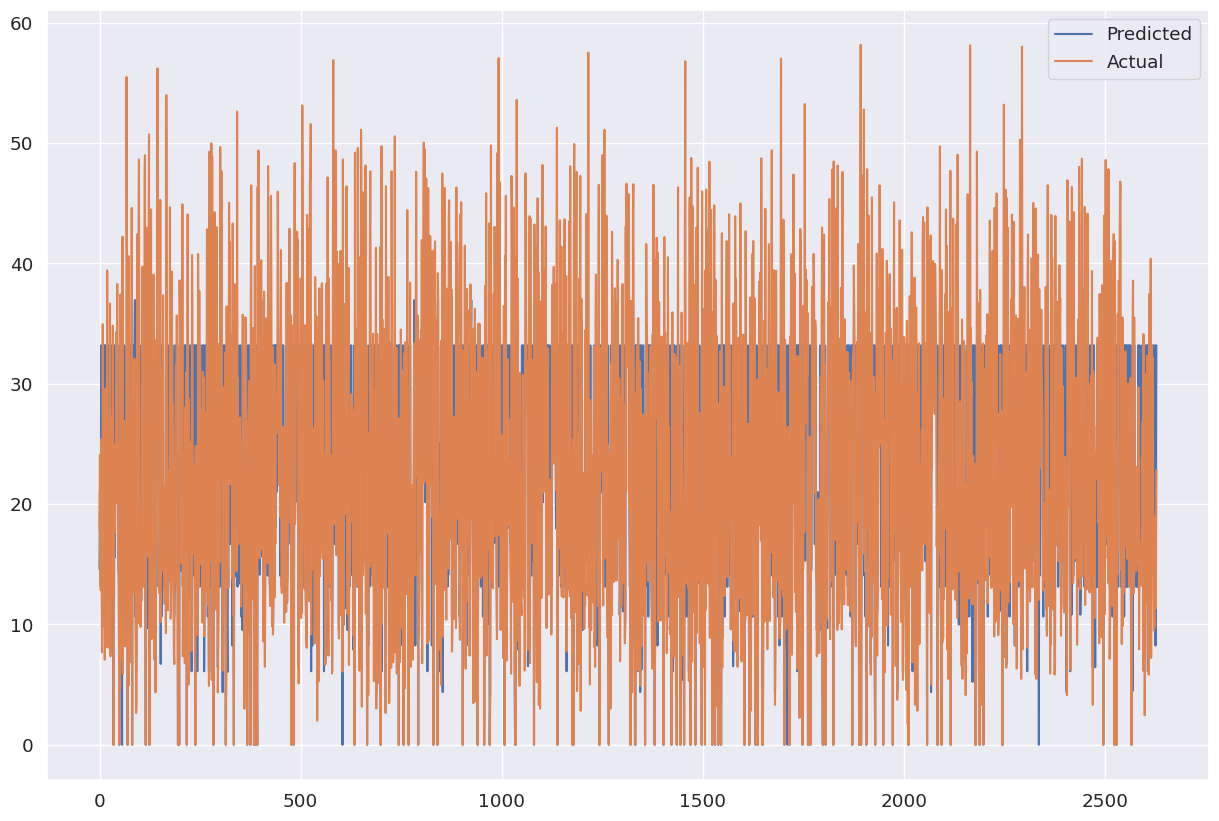

In [ ]:
# Plot the figure
plt.figure(figsize = (15,10))
plt.plot((y_pred_test_dt))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

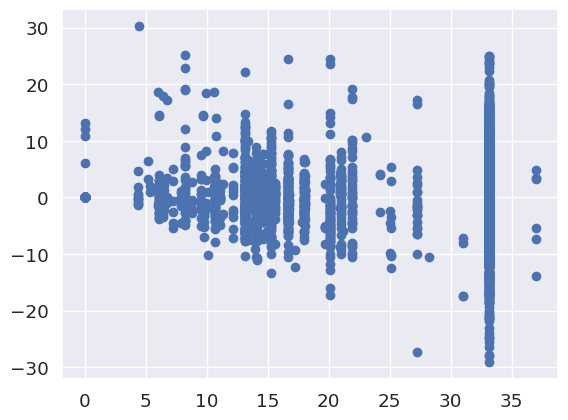

In [ ]:
# Visualize the model's performance on the test set
plt.scatter((y_pred_test_dt),(y_test-y_pred_test_dt))

### Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Random Forest** is a machine learning algorithm that combines multiple decision trees to make accurate predictions. It creates an ensemble of decision trees by randomly selecting subsets of features and data samples. Each tree independently predicts the target variable, and the final prediction is determined by aggregating the individual tree predictions. Random Forest is effective in handling high-dimensional data, providing robustness against overfitting, and identifying important features for prediction.

In [ ]:
# ML Model - 3 Implementation
rf = RandomForestRegressor()
# Fit the Algorithm
rf.fit(X_train,y_train)
# Predict on the model
y_pred_rf = rf.predict(X_test)

In [ ]:
# Check the score
rf.score(X_train, y_train)

0.9890259407917074

In [ ]:
# Get the X_train and X-test value
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [ ]:
# Calculate MSE
mse_rf = mean_squared_error((y_train), (y_pred_train_rf))
print("MSE :",mse_rf)

# Calculate RMSE
rmse_rf = np.sqrt(mse_rf)
print("RMSE :",rmse_rf)


# Calculate MAE
mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",mae_rf)


# Calculate R-squared score
r2_rf = r2_score(y_train, y_pred_train_rf)
print("R2 :",r2_rf)

# Calculate Adjusted R-squared score
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf)

MSE : 1.7070424349660702
RMSE : 1.306538340411819
MAE : 0.8193091285234322
R2 : 0.9890259407917074
Adjusted R2 : 0.9888260257596183


In [ ]:
# Storing the test set metrics value in a dataframe for later comparison
dict1 = {'Model':'Random Forest',
         'MAE':round((mae_rf),3),
         'MSE':round((mse_rf),3),
         'RMSE':round((rmse_rf),3),
         'R2_score':round((r2_rf),3),
         'Adjusted R2':round((Adjusted_R2_rf),2)}
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
# Calculate MSE
mse_rf = mean_squared_error((y_test), (y_pred_test_rf))
print("MSE :",mse_rf)

# Calculate RMSE
rmse_rf = np.sqrt(mse_rf)
print("RMSE :",rmse_rf)


# Calculate MAE
mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",mae_rf)


# Calculate R-squared score
r2_rf = r2_score(y_test, y_pred_test_rf)
print("R2 :",r2_rf)

# Calculate Adjusted R-squared score
Adjusted_R2_rf = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf)

MSE : 12.463593886177748
RMSE : 3.5303815496597175
MAE : 2.225022013679147
R2 : 0.9188557994106287
Adjusted R2 : 0.9173775911053185


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2 = {'Model':'Random Forest',
         'MAE':round((mae_rf),3),
         'MSE':round((mse_rf),3),
         'RMSE':round((rmse_rf),3),
         'R2_score':round((r2_rf),3),
         'Adjusted R2':round((Adjusted_R2_rf),2)}
test_df = test_df.append(dict2,ignore_index = True)

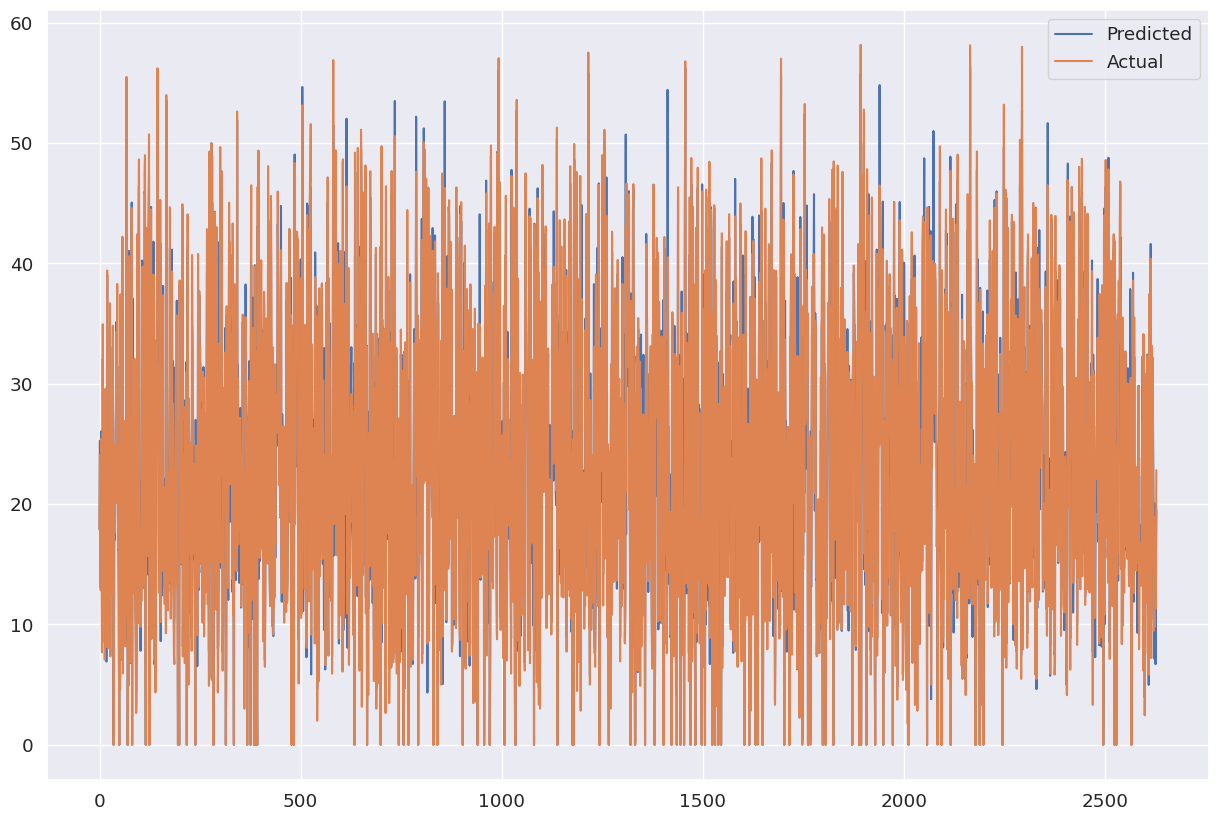

In [ ]:
#Plot the figure
plt.figure(figsize = (15,10))
plt.plot((y_pred_test_rf))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

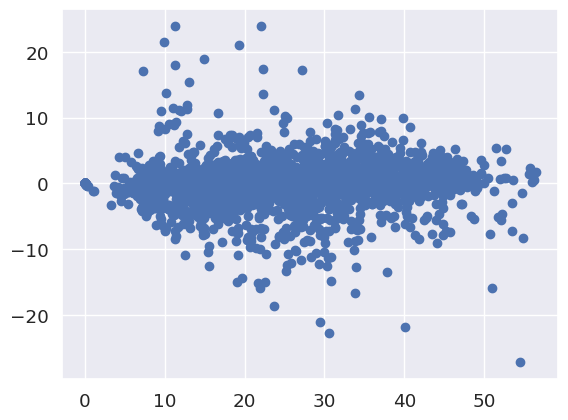

In [ ]:
# Visualize the model's performance on the test set
plt.scatter((y_pred_test_rf),(y_test-y_pred_test_rf))

#**Hyperparameter tuning** 

Prior to reaching a conclusion, let us explore the possibility of improving our model's performance by tuning certain hyperparameters.

Hyperparameter tuning involves selecting the most suitable values for specific parameters in a learning algorithm. These hyperparameters are predetermined model arguments that are set prior to the learning process. Effective hyperparameter tuning is crucial for optimizing machine learning algorithms.

<b> Using GridSearchCV

GridSearchCV facilitates the iteration over pre-defined hyperparameters and trains the model on the training set. As a result, we are able to identify and select the optimal parameters from the provided list of hyperparameters.

##**Gradient Boost with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

### **Importing Gradient Boosting Regressor**

In [ ]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
# Fit the Algorithm
gb_grid.fit(X_train,y_train)

# Predict on the model
y_pred_gb_grid = gb_grid.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.3s
[CV] END max_depth=4, min_sam

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Get the X_train and X-test value
y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
# Check the score
gb_optimal_model.score(X_train,y_train)

0.9511815199216302

In [ ]:
# Calculate MSE
mse_gbh= mean_squared_error((y_train), (y_pred_train_g_g))
print("MSE :",mse_gbh)

# Calculate RMSE
rmse_gbh=np.sqrt(mse_gbh)
print("RMSE :",rmse_gbh)

# Calculate MAE
mae_gbh= mean_absolute_error((y_train), (y_pred_train_g_g))
print("MAE:", mae_gbh)

# Calculate R-squared score
r2_gbh= r2_score((y_train), (y_pred_train_g_g))
print("R2 :",r2_gbh)

# Calculate Adjusted R-squared score
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_gbh)

MSE : 7.593837022616925
RMSE : 2.7556917502901017
MAE: 1.8722468646198418
R2 : 0.9511815199216302
Adjusted R2 : 0.9502921910209778


In [ ]:
# Storing the test set metrics value in a dataframe for later comparison
dict1 = {'Model':'Gradient Boost With GridsearchCV',
         'MAE':round((mae_gbh),3),
         'MSE':round((mse_gbh),3),
         'RMSE':round((rmse_gbh),3),
         'R2_score':round((r2_gbh),3),
         'Adjusted R2':round((Adjusted_R2_gbh),2)}

training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
# Calculate MSE
mse_gbh= mean_squared_error((y_train), (y_pred_train_g_g))
print("MSE :",mse_gbh)

# Calculate RMSE
rmse_gbh=np.sqrt(mse_gbh)
print("RMSE :",rmse_gbh)

# Calculate MAE
mae_gbh= mean_absolute_error((y_train), (y_pred_train_g_g))
print("MAE:", mae_gbh)

# Calculate R-squared score
r2_gbh= r2_score((y_train), (y_pred_train_g_g))
print("R2 :",r2_gbh)

# Calculate Adjusted R-squared score
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_gbh)

MSE : 7.593837022616925
RMSE : 2.7556917502901017
MAE: 1.8722468646198418
R2 : 0.9511815199216302
Adjusted R2 : 0.9502921910209778


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boost With GridsearchCV',
         'MAE':round((mae_gbh),3),
         'MSE':round((mse_gbh),3),
         'RMSE':round((rmse_gbh),3),
         'R2_score':round((r2_gbh),3),
         'Adjusted R2':round((Adjusted_R2_gbh),2)}
test_df=test_df.append(dict2,ignore_index=True)

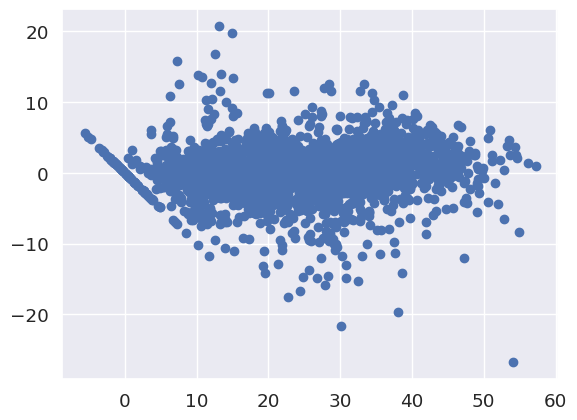

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
# Feature Importance of Optimized Gradient Boosting Model
gb_optimal_model.feature_importances_

array([3.09667791e-01, 1.54248768e-01, 6.07154957e-03, 6.83516651e-03,
       3.68680762e-02, 4.28792217e-02, 1.11650084e-03, 1.07551032e-03,
       1.16244119e-02, 1.99885494e-02, 2.84837056e-02, 2.49667206e-02,
       6.40806527e-03, 3.35472372e-03, 1.27767184e-02, 4.10992538e-04,
       3.73883525e-03, 1.71449799e-03, 5.42620809e-05, 1.03484218e-04,
       5.89477322e-05, 1.77342912e-04, 1.20833397e-03, 9.06750433e-03,
       3.18840296e-02, 1.68869353e-02, 1.19745869e-02, 1.33064207e-02,
       1.09469039e-02, 2.07969502e-03, 4.61582362e-03, 7.60331715e-04,
       1.50788469e-02, 2.07362834e-03, 1.62034994e-01, 7.50751354e-05,
       1.27320247e-03, 2.07563327e-04, 1.28908939e-03, 3.59821995e-03,
       1.17797630e-03, 6.24026702e-03, 1.47930462e-04, 5.35209302e-03,
       4.82315548e-03, 1.11282541e-03, 2.01607258e-02])

In [ ]:
# Feature Importance Analysis: Identifying Key Features using Gradient Boosting
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
# Rounding Feature Importance Values
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

Feature  Feature Importance
0      Temperature                0.31
1         Humidity                0.15
2       Wind_speed                0.01
3       Visibility                0.01
4  Solar_Radiation                0.04

In [ ]:
# Sorting values by Feature Importance
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0                Temperature                0.31
34       Functioning_Day_Yes                0.16
1                   Humidity                0.15
4            Solar_Radiation                0.04
5                   Rainfall                0.04
10                    Hour_4                0.03
24                   Hour_18                0.03
32            Seasons_Winter                0.02
25                   Hour_19                0.02
11                    Hour_5                0.02
46  weekdays_weekend_Weekend                0.02
9                     Hour_3                0.02
8                     Hour_2                0.01
43                  month_10                0.01
41                   month_8                0.01
2                 Wind_speed                0.01
3                 Visibility                0.01
12                    Hour_6                0.01
28                   Hour_22                0.01
27                   Hour_21                0.01
26                   Hour_20                0.01
23                   Hour_17                0.01
14                    Hour_8                0.01
22                   Hour_16                0.00
35                   month_2                0.00
45                  month_12                0.00
44                  month_11                0.00
13                    Hour_7                0.00
42                   month_9                0.00
40                   month_7                0.00
39                   month_6                0.00
38                   month_5                0.00
37                   month_4                0.00
36                   month_3                0.00
15                    Hour_9                0.00
21                   Hour_15                0.00
33        Holiday_No Holiday                0.00
16                   Hour_10                0.00
31            Seasons_Summer                0.00
30            Seasons_Spring                0.00
17                   Hour_11                0.00
18                   Hour_12                0.00
19                   Hour_13                0.00
20                   Hour_14                0.00
6                   Snowfall                0.00
7                     Hour_1                0.00
29                   Hour_23                0.00

In [ ]:
# Model fit
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Assigning Column Headings as features
features = X_train.columns
importances = gb_model.feature_importances_

# Sorting Feature Importances
indices = np.argsort(importances)

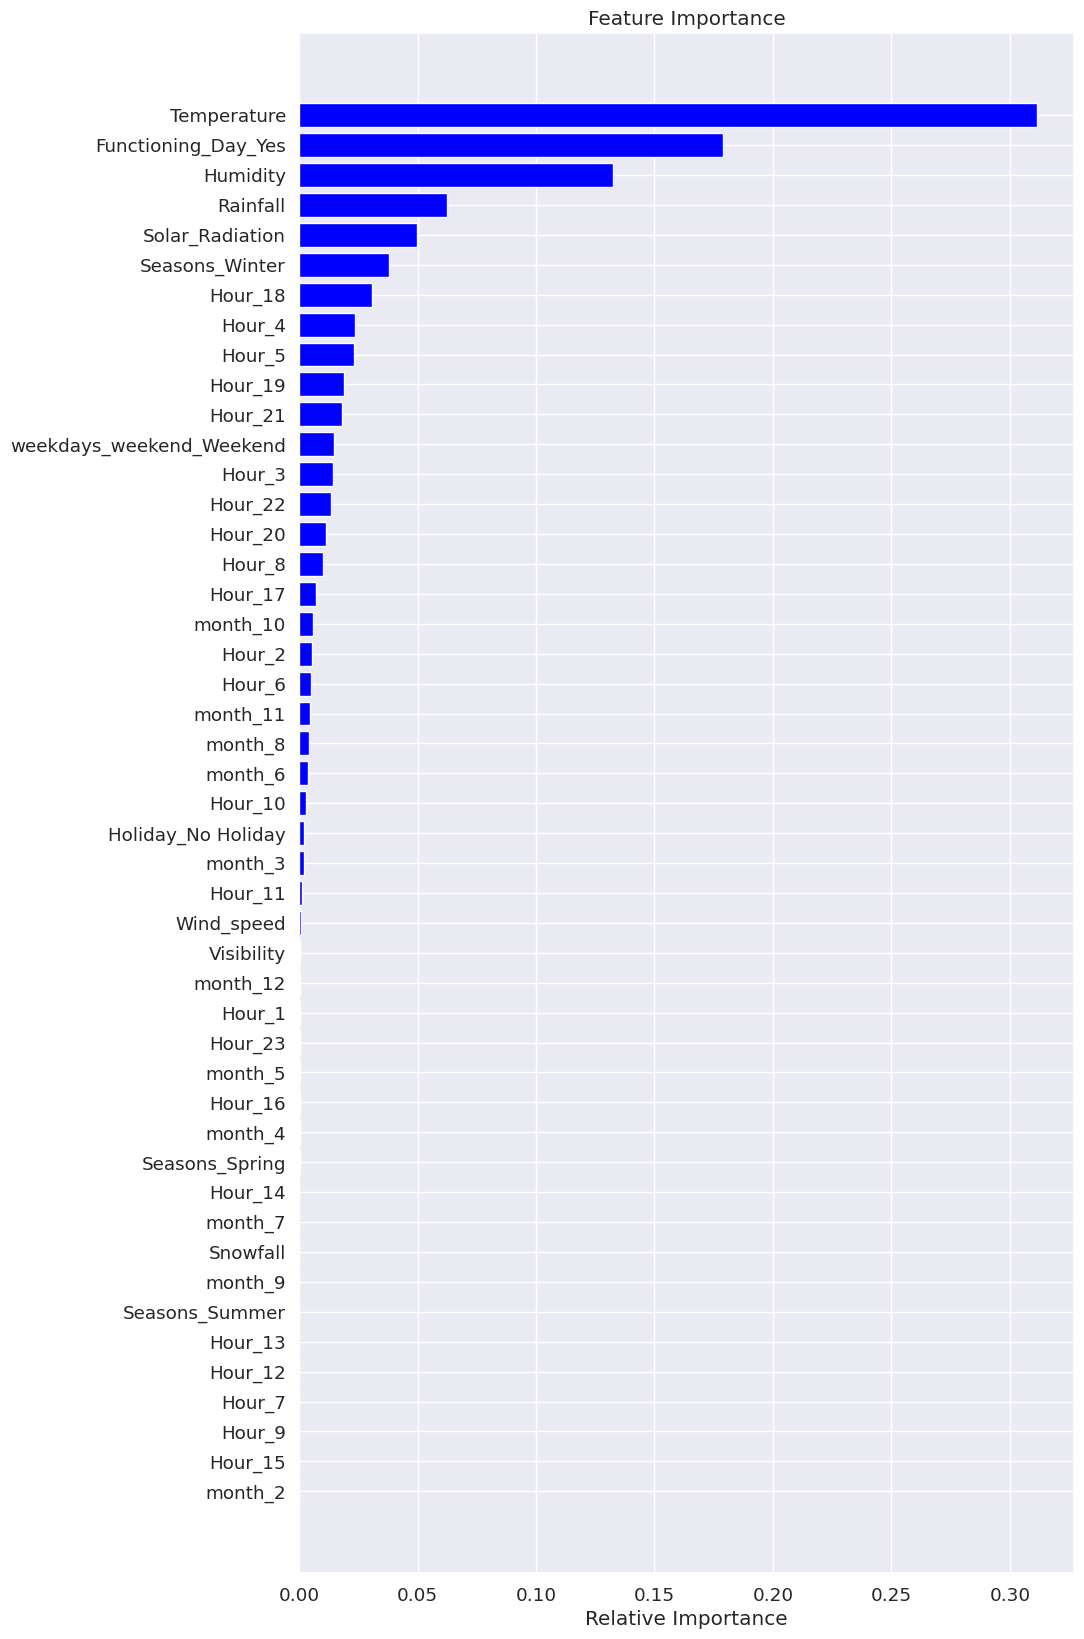

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### Which ML model did you choose from the above created models as your final prediction model and why?

Based on the performance metrics, I selected Random Forest and Gradient Boosting with GridSearchCV as my final prediction models. This decision is supported by the highest R2 scores achieved by the Random Forest Regressor (99% for the Train Set and 92% for the Test Set) and the Gradient Boosting algorithm (95% for the Train Set and 95% for the Test Set).

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Gradient Boosting with GridSearchCV is a machine learning technique used for regression tasks. In this approach, multiple prediction models which are sequentially trained to correct the errors made by the previous models. The GridSearchCV component is used to systematically explore various combinations of hyperparameters to find the optimal configuration for the Gradient Boosting model.

To understand the importance of different features in the model's predictions, we can utilize model explainability tools. One common tool is feature importance analysis. It helps us determine which features contribute the most to the model's overall predictive power. By analyzing the feature importances, we can gain insights into the relative significance of each feature in the model's decision-making process.

# **Conclusion**

During our analysis, we initially conducted exploratory data analysis (EDA) on all the features in our dataset. We began by examining our dependent variable, 'Rented Bike Count,' and performed a transformation on it. We then proceeded to analyze the categorical variables, dropping the variable that exhibited a majority of one class. Additionally, we explored the numerical variables, investigating their correlation, distribution, and relationship with the dependent variable. Furthermore, we eliminated certain numerical features that predominantly consisted of zero values and applied one-hot encoding to the categorical variables.

Subsequently, we implemented seven machine learning algorithms, namely Linear Regression, Lasso, Ridge, ElasticNet, Decision Tree, Random Forest, and XGBoost as well as Gradient Boost with GridSearchCV for hyperparameter tunning. We performed hyperparameter tuning to enhance the performance of our models. The results of our evaluation are as follows:

In [ ]:
# displaying the results of evaluation metric values for all models
result = pd.concat([training_df,test_df],keys = ['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0                Linear regression   4.480  35.224  5.935   
             1                 Lasso regression   7.286  92.602  9.623   
             2                 Ridge regression   4.480  35.224  5.935   
             3           Elastic Net regression   5.799  57.687  7.595   
             4                     Decision Tree  5.099  49.673  7.048   
             5                     Random Forest  0.819   1.707  1.307   
             6  Gradient Boost With GridsearchCV  1.872   7.594  2.756   
Test set     0                Linear regression   4.428  33.348  5.775   
             1                 Lasso regression   7.336  93.344  9.661   
             2                 Ridge regression   4.480  35.224  5.935   
             3           Elastic Net regression   5.799  57.687  7.595   
             4                     Decision Tree  5.288  52.413  7.240   
             5                     Random Forest  2.225  12.464  3.530   
             6  Gradient Boost With GridsearchCV  1.872   7.594  2.756   

                R2_score  Adjusted R2  
Training set 0     0.774         0.77  
             1     0.405         0.39  
             2     0.774         0.77  
             3     0.629         0.62  
             4     0.681         0.67  
             5     0.989         0.99  
             6     0.951         0.95  
Test set     0     0.783         0.78  
             1     0.392         0.38  
             2     0.774         0.77  
             3     0.629         0.62  
             4     0.659         0.65  
             5     0.919         0.92  
             6     0.951         0.95

* There is no evidence of overfitting in any model.

* The Random Forest Regressor and Gradient Boosting GridSearchCV achieve the highest R2 scores of 99% and 95% respectively for the Train Set, and 92% and 95% respectively for the Test Set.

* The Feature Importance values differ between Random Forest and Gradient Boost.

* We can proceed with deploying this model.

However, this is not the ultimate conclusion. Since the data is time-dependent, variables such as temperature, windspeed, solar radiation, etc., may not always remain consistent. Therefore, there may be scenarios where the model's performance is not optimal. As Machine Learning is a rapidly evolving field, we need to be prepared for various contingencies and continuously monitor our model. Hence, possessing a strong understanding and keeping up with the ever-changing landscape of ML would undoubtedly help us stay ahead in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***